# INTRODUCTION

Definition of 'Non Performing Assets'

Definition: A non performing asset (NPA) is a loan or advance for which the principal or interest payment remained overdue for a period of 90 days.

Description: Banks are required to classify NPAs further into Substandard, Doubtful and Loss assets.

1. Substandard assets: Assets which has remained NPA for a period less than or equal to 12 months.

2. Doubtful assets: An asset would be classified as doubtful if it has remained in the substandard category for a period of 12 months.

3. Loss assets: As per RBI, “Loss asset is considered uncollectible and of such little value that its continuance as a bankable asset is not warranted, although there may be some salvage or recovery value.”

**MOTIVATION:**
Non-performing assets are a reflection of the bank’s overall efficiency while
performing its business of converting deposits into loans and recovering these loans. Non-recovery or partial recovery of loans has an impact on the bank’s balance sheet and income statement items in the form of reduction in interest earned on loan assets, increase in provision on NPAs, increase in capital requirement and lower profits. Hence, rising NPAs are a concern for a bank and determinants of NPAs should be identified prior to loans turning into NPAs.

**OBJECTIVE**: To find Association of NNPA ratio with different ratios such as operational capability and profitability of Schedule Commercial Banks published in RBI website and some other factors like CPI, repo rate and sector wise advances.

**Data Source:**

https://dbie.rbi.org.in/DBIE/dbie.rbi?site=publications

https://fred.stlouisfed.org/series/INDCPIALLQINMEI

https://www.bankbazaar.com/finance-tools/emi-calculator/current-rbi-bank-interest-rates.html

Data Set contain 37 columns and 1422 rows containing data of Public Sector, Private Sector, Foreign Bank Group, Small Finance Bank and Paytm Banks data from the year 2005 to 2020 Analysis was focused on the data ranging from year 2007 to 2020 of Public Sector and Private Sector bank group. Additionaly we added bank group, cpi and repo rate data. The NNPA ratio was divided into 3 brackets Low(<1%), Medium(1%-2%) and high(>2%)

# Data Wrangling

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from IPython.display import display

In [2]:
# Loading NPA and other ratios data
path = 'DataFolder/Selected_Ratios_of_Scheduled_Commercial_Banks.xlsx'

df = pd.read_excel(path)
df.Bank = df.Bank.apply(lambda x:x.strip(" "))
df.head(2)

,Year,Bank,1. Cash - Deposit Ratio\r\n,2. Credit - Deposit Ratio,3. Investment - Deposit Ratio,4. (Credit + Investment) - Deposit Ratio\r\n,5. Ratio of deposits to total liabilities\r\n,6. Ratio of demand & savings bank deposits to total deposits\r\n,7. Ratio of priority sector advances to total advances\r\n,8. Ratio of term loans to total advances\r\n,...,26. Return on advances\r\n,27. Return on investments\r\n,28. Return on advances adjusted to cost of funds\r\n,29. Return on investments adjusted to cost of funds\r\n,30. Business per employee (in Rupees Lakh),31. Profit per employee (in Rupees Lakh),32. Capital adequacy ratio\r\n,33. Capital adequacy ratio - Tier I\r\n,34. Capital adequacy ratio - Tier II\r\n,35. Ratio of net NPA To net advances\r\n
0,2020,STATE BANK OF INDIA,5.14359,71.7323,32.2973,104.03,82.0374,44.2281,22.6499,65.9077,...,7.96906,6.77314,3.33375,2.13783,2105,5.7898,13.06,11,2.06,2.23
1,2020,ALLAHABAD BANK,3.22237,62.5369,35.2859,97.8229,88.6072,47.8241,38.5082,52.2005,...,7.89067,6.43546,2.9504,1.49519,1676,-23.1,12.01,8.01,4,5.66


Column name are very large text. We will rename these columns. We will also create a function which will return original column name corresponding to new column name incase we required to look at actual column name in future

In [3]:
# Renaming the columns
col_dict= {}
col_list = df.columns.tolist()
name_list = [f"V{i}" for i in range(df.shape[1])]
for i,v in enumerate(col_list):
    col_dict[v] = name_list[i]

df.rename(columns=col_dict, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(2)

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36
0,2020,STATE BANK OF INDIA,5.14359,71.7323,32.2973,104.03,82.0374,44.2281,22.6499,65.9077,...,7.96906,6.77314,3.33375,2.13783,2105,5.7898,13.06,11,2.06,2.23
1,2020,ALLAHABAD BANK,3.22237,62.5369,35.2859,97.8229,88.6072,47.8241,38.5082,52.2005,...,7.89067,6.43546,2.9504,1.49519,1676,-23.1,12.01,8.01,4,5.66


In [4]:
# name function
def col_name(arg):
    col_keys = list(col_dict.keys())
    col_val = list(col_dict.values())
    ind = col_val.index(arg)
    cKey = col_keys[ind]
    return col_keys[ind]

col_name('V1')

'Bank'

Same Bank is represented through slight different bank name. We will correct those bank name by giving them same name. 

Note: We are focused on domestic banks. Foreign bank data will be dropped later. So we will focus on correcting domesting bank nam

In [5]:
Bank_list = df.V1.unique()
sorted(Bank_list)[:6]   # We can see same bank has slightly different name

['AB BANK LIMITED',
 'ABU DHABI COMMERCIAL BANK',
 'ABU DHABI COMMERCIAL BANK PJSC',
 'ALLAHABAD BANK',
 'AMERICAN EXPRESS BANK',
 'AMERICAN EXPRESS BANKING CORP.']

In [6]:
for i in Bank_list:
    if 'BANK OF INDIA' in i:
        print(i)
    if 'INDIAN BANK' in i:
        print(i)
    if i in ['STATE BANK OF BIKANER AND JAIPUR','STATE BANK OF BIKANER & JAIPUR']:
        print(i)

# BANK OF INDIA,'INDIAN BANK' not required any correction. 
#If done it will replace other bank with it's name.

# Also 'CATHOLIC SYRIAN BANK LTD','THE DHANALAKSHMI BANK LTD' and 
#'STATE BANK OF BIKANER AND JAIPUR' need to be handel seperately

STATE BANK OF INDIA
BANK OF INDIA
CENTRAL BANK OF INDIA
INDIAN BANK
UNION BANK OF INDIA
UNITED BANK OF INDIA
SOUTH INDIAN BANK LTD
STATE BANK OF BIKANER AND JAIPUR
STATE BANK OF BIKANER & JAIPUR
SOUTH INDIAN BANK


In [7]:
for i in Bank_list:
    for j in Bank_list:
        if (i in j)&(i!=j)&(i not in ['CATHOLIC SYRIAN BANK LTD',
                                      'THE DHANALAKSHMI BANK LTD',
                                      'BANK OF INDIA','INDIAN BANK',
                                      'STATE BANK OF BIKANER AND JAIPUR']):
          indices = df[(df.V1==i)|(df.V1==j)].index.tolist()
          df.loc[indices,'V1'] = i
        elif i == 'CATHOLIC SYRIAN BANK LTD':
            indices = df[df.V1==i].index.tolist()
            df.loc[indices,'V1'] = 'CSB BANK LIMITED'
        elif i == 'THE DHANALAKSHMI BANK LTD':
            indices = df[df.V1==i].index.tolist()
            df.loc[indices,'V1'] = 'DHANLAXMI BANK'
        elif i == 'STATE BANK OF BIKANER AND JAIPUR':
            indices = df[df.V1==i].index.tolist()
            df.loc[indices,'V1'] = 'STATE BANK OF BIKANER & JAIPUR'

In [8]:
sorted(df.V1.unique())[:6]

['AB BANK LIMITED',
 'ABU DHABI COMMERCIAL BANK',
 'ALLAHABAD BANK',
 'AMERICAN EXPRESS BANK',
 'ANDHRA BANK',
 'AU SMALL FINANCE BANK LIMITED']

Loading bank asset data in dataframe. This data contain bankgroup for each bank to which it belongs to. We will use this to add bank group column to df dataframe. 

Bank group in asset data file is not stored in a seperate column. Rather it's cell value in bank name data column at the end of each group. So we will extract bank group from those rows and put it in seperate column. At the end of each year file contains aggregate values for all SCBs forthe respective year.
We will drop those rows first

In [9]:
# Loading Asset data in dataframe
df2 = pd.read_excel("DataFolder/Assets_of_Scheduled_Commercial_Banks2.xlsx")

# removing trailing spaces from bank names
df2.BankName = df2.BankName.apply(lambda x:x.strip(" "))

# Dropping aggregate rows.
df2.drop(index=df2[df2['BankName']=='ALL SCHEDULED COMMERCIAL BANKS'].index.tolist(),axis=0,inplace=True)
df2.head(2)

,Year,BankName,7. Advances\r\n,7A.3. Term loans\r\n,7B.3. Unsecured\r\n,(i) Priority sectors \r\n,(ii) Public sectors\r\n,(iii) Banks\r\n
0,2020,ALLAHABAD BANK,142965,74628.3,11945.5,55053.1,8972.93,-
1,2020,ANDHRA BANK,157742,67605.7,5119.22,70467.3,14497.1,-


Asset dataframe df2 column names contains unnecessary character. We will remove them.

In [10]:
# renaming column names of asset dataframe
cols2 = df2.columns.tolist()
new_col2 = [(x.strip("\r\n"))[3:].strip(" ") if x not in ['Year', 
                                                          'BankName'] else x for x in cols2 ]
new_col3 = [x[7:].strip(" ") if x not in ['Year', 'BankName', 
                                          'Advances'] else x for x in new_col2 ]
print(new_col3)

df2.rename(columns={cols2[i]:new_col3[i] for i in range(len(cols2))}, inplace=True)
df2.head(2)

['Year', 'BankName', 'Advances', 'Term loans', 'Unsecured', 'Priority sectors', 'Public sectors', 'Banks']


,Year,BankName,Advances,Term loans,Unsecured,Priority sectors,Public sectors,Banks
0,2020,ALLAHABAD BANK,142965,74628.3,11945.5,55053.1,8972.93,-
1,2020,ANDHRA BANK,157742,67605.7,5119.22,70467.3,14497.1,-


Adding Bank group columns in asset to dataframe where we will put bank group name for corresponding bank in BankName column by extracting bank group from respective BankName columns

In [11]:
# Initialising Bank Group column
df2.insert(column='bankGroup',loc=1,value=0)
display(df2.head(2))
print("******************")
 

# Filling all the cells in BankGroup column with appropiate values
# Bank group list
bankGrp = ['PUBLIC SECTOR BANKS','PRIVATE SECTOR BANKS','FOREIGN BANKS',
           'SMALL FINANCE BANKS','PAYMENTS BANK',
           'STATE BANK OF INDIA & ITS ASSOCIATES','NATIONALISED BANKS']

# Getting index of rows at which Bank Group name lies in BankName column
indices = df2[df2.BankName.isin(bankGrp)].index.tolist()


# Filling bankGroup column with appropiate values
counter = 0
for i in indices:
    df2.loc[counter:i,'bankGroup'] = df2.loc[i,'BankName']
    counter = i+1


# Finally dropping those rows where BankName column bank group name instead of ban name
df2.drop(axis=0,index=indices,inplace=True)
df2.reset_index(drop=True)
display(df2.head(2))
print("******************")


df2.bankGroup.value_counts()

,Year,bankGroup,BankName,Advances,Term loans,Unsecured,Priority sectors,Public sectors,Banks
0,2020,0,ALLAHABAD BANK,142965,74628.3,11945.5,55053.1,8972.93,-
1,2020,0,ANDHRA BANK,157742,67605.7,5119.22,70467.3,14497.1,-


******************


,Year,bankGroup,BankName,Advances,Term loans,Unsecured,Priority sectors,Public sectors,Banks
0,2020,PUBLIC SECTOR BANKS,ALLAHABAD BANK,142965,74628.3,11945.5,55053.1,8972.93,-
1,2020,PUBLIC SECTOR BANKS,ANDHRA BANK,157742,67605.7,5119.22,70467.3,14497.1,-


******************


FOREIGN BANKS                           610
PRIVATE SECTOR BANKS                    357
NATIONALISED BANKS                      264
STATE BANK OF INDIA & ITS ASSOCIATES     88
PUBLIC SECTOR BANKS                      59
SMALL FINANCE BANKS                      25
PAYMENTS BANK                             1
Name: bankGroup, dtype: int64

Like in df dataframe, in df2 dataframe also same bank is represented through slight different bank name. We will correct those bank name by giving them same name. 

Note: We are focused on domestic banks. Foreign bank data will be dropped later. So we will focus on correcting domesting bank nam

In [12]:
Bank_list2 = df2.BankName.unique()
sorted(Bank_list2)[:6]   # We can see same bank has slightly different name

['AB BANK LIMITED',
 'ABU DHABI COMMERCIAL BANK',
 'ABU DHABI COMMERCIAL BANK PJSC',
 'ALLAHABAD BANK',
 'AMERICAN EXPRESS BANK',
 'AMERICAN EXPRESS BANKING CORP.']

In [13]:
for i in Bank_list2:
    for j in Bank_list2:
        if (i in j)&(i!=j)&(i not in ['CATHOLIC SYRIAN BANK LTD',
                                      'THE DHANALAKSHMI BANK LTD',
                                      'BANK OF INDIA','INDIAN BANK',
                                      'STATE BANK OF BIKANER AND JAIPUR']):
          indices = df2[(df2.BankName==i)|(df2.BankName==j)].index.tolist()
          df2.loc[indices,'BankName'] = i
        elif i == 'CATHOLIC SYRIAN BANK LTD':
            indices = df2[df2.BankName==i].index.tolist()
            df2.loc[indices,'BankName'] = 'CSB BANK LIMITED'
        elif i == 'THE DHANALAKSHMI BANK LTD':
            indices = df2[df2.BankName==i].index.tolist()
            df2.loc[indices,'BankName'] = 'DHANLAXMI BANK'
        elif i == 'STATE BANK OF BIKANER AND JAIPUR':
            indices = df2[df2.BankName==i].index.tolist()
            df2.loc[indices,'BankName'] = 'STATE BANK OF BIKANER & JAIPUR'

In [14]:
Bank_list2 = df2.BankName.unique()
sorted(Bank_list2)[:6]   # We can see same bank has slightly different name

['AB BANK LIMITED',
 'ABU DHABI COMMERCIAL BANK',
 'ALLAHABAD BANK',
 'AMERICAN EXPRESS BANK',
 'ANDHRA BANK',
 'AU SMALL FINANCE BANK LIMITED']

Adding Bank Group Column to df dataframe

In [15]:
col_name('V1')

'Bank'

In [16]:
# Initilising bankGrp column
df.insert(loc=1, column='bankGrp', value=0)

bank_list = df.V1.unique()
for b in bank_list:
    df.loc[df.V1==b,'bankGrp'] = (df2[df2.BankName.apply(lambda x:x.lower()) == b.lower()
    ].bankGroup).tolist()[0] if len((df2[df2.BankName.apply(lambda x:x.lower()) == b.lower()
    ].bankGroup).tolist()[:1]) != 0 else 'No Group'

df.head(2)

,V0,bankGrp,V1,V2,V3,V4,V5,V6,V7,V8,...,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36
0,2020,PUBLIC SECTOR BANKS,STATE BANK OF INDIA,5.14359,71.7323,32.2973,104.03,82.0374,44.2281,22.6499,...,7.96906,6.77314,3.33375,2.13783,2105,5.7898,13.06,11,2.06,2.23
1,2020,PUBLIC SECTOR BANKS,ALLAHABAD BANK,3.22237,62.5369,35.2859,97.8229,88.6072,47.8241,38.5082,...,7.89067,6.43546,2.9504,1.49519,1676,-23.1,12.01,8.01,4,5.66


In [17]:
df.bankGrp.value_counts()

FOREIGN BANKS                           599
PRIVATE SECTOR BANKS                    381
PUBLIC SECTOR BANKS                     318
STATE BANK OF INDIA & ITS ASSOCIATES     77
SMALL FINANCE BANKS                      25
No Group                                 17
NATIONALISED BANKS                        4
PAYMENTS BANK                             1
Name: bankGrp, dtype: int64

The Bank Belonging to No group are actually foreign banks. So we will drop them.
We will drop data before 2007 since domestic banks were going reforms at that period.
We will also all other group except Private SECTOR BANKS, PUBLIC SECTOR BANKS,
STATE BANK OF INDIA & ITS ASSOCIATES and NATIONALISED BANKS

In [18]:
df[df.bankGrp=='No Group'].head()

,V0,bankGrp,V1,V2,V3,V4,V5,V6,V7,V8,...,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36
58,2020,No Group,DOHA BANK Q.P.S.C.,17.0479,74.001,19.6359,93.637,78.7878,31.7108,48.6758,...,7.5382,6.0622,2.16057,0.684569,2814.04,6.12,26.87,26.06,0.81,-
82,2020,No Group,SUMITOMO MITSUI BANK,37.3913,75.4143,47.8289,123.243,58.1049,8.36382,12.5835,...,9.19111,5.27267,2.85225,-1.0662,13373,127,40.86,40.1,0.76,-
156,2019,No Group,DOHA BANK Q.P.S.C.,4.89028,99.7445,32.6336,132.378,63.8869,32.0467,26.2388,...,7.54463,6.70413,2.02769,1.18719,2202.02,18.59,30.47,29.81,0.66,-
180,2019,No Group,SUMITOMO MITSUI BANK,12.6001,74.6295,47.2529,121.882,64.3167,9.33125,19.2361,...,10.7679,5.97301,3.44837,-1.34651,9050,95,30.33,29.78,0.55,-
250,2018,No Group,DOHA BANK Q.P.S.C.,4.76457,87.7865,24.1192,111.906,64.7721,40.4615,26.9462,...,7.5704,6.34501,2.83564,1.61024,2044.1,-16.84,30.64,30.33,0.31,-


In [19]:
col_name('V0')  # Checking wich column is year column

'Year'

In [20]:
df = df[df.V0>2006]

# We will strict our analysis only to domestic banks
df = df[df.bankGrp.isin(['PRIVATE SECTOR BANKS','PUBLIC SECTOR BANKS',
                         'STATE BANK OF INDIA & ITS ASSOCIATES','NATIONALISED BANKS'])]
df.bankGrp.value_counts()

PRIVATE SECTOR BANKS                    320
PUBLIC SECTOR BANKS                     278
STATE BANK OF INDIA & ITS ASSOCIATES     63
NATIONALISED BANKS                        4
Name: bankGrp, dtype: int64

STATE BANK OF INDIA & ITS ASSOCIATES and NATIONALISED BANKS are also Public Sector Bank. So will group them in same Group

In [21]:
# getting index where Bank Grop is STATE BANK OF INDIA & ITS ASSOCIATES
indices = df[df.bankGrp == 'STATE BANK OF INDIA & ITS ASSOCIATES'].index
# Replacing bank group 'STATE BANK OF INDIA & ITS ASSOCIATES' with PUBLIC SECTOR BANK
df.loc[indices,'bankGrp'] = 'PUBLIC SECTOR BANKS'

# getting index where Bank Grop is NATIONALISED BANKS
indices = df[df.bankGrp == 'NATIONALISED BANKS'].index
# Replacing bank group 'NATIONALISED BANKS' with PUBLIC SECTOR BANK
df.loc[indices,'bankGrp'] = 'PUBLIC SECTOR BANKS'
df.bankGrp.value_counts()

PUBLIC SECTOR BANKS     345
PRIVATE SECTOR BANKS    320
Name: bankGrp, dtype: int64

There are some missing values denoted by '-' or 'NA'

In [22]:
# Checking missing values
((df == '-')|(df == 'NA')).sum()

V0          0
bankGrp     0
V1          0
V2          0
V3          0
V4          0
V5          0
V6          0
V7          0
V8          0
V9          0
V10         0
V11         0
V12         0
V13         0
V14         0
V15         0
V16         0
V17         0
V18         0
V19         0
V20         0
V21         0
V22         0
V23         0
V24         0
V25         6
V26        10
V27         0
V28         0
V29        10
V30        10
V31         0
V32         1
V33         1
V34         2
V35         1
V36        16
dtype: int64

In [23]:
# replacing missing values with nan
df.replace(["-",'NA'],np.nan, inplace=True)

In [24]:
(df == 'NA').sum().sum(), (df == '-').sum().sum()

(0, 0)

In [25]:
# Counting null values
df.isnull().sum()

V0          0
bankGrp     0
V1          0
V2         10
V3         10
V4         10
V5         10
V6         10
V7         10
V8         10
V9         10
V10        10
V11        10
V12        11
V13        11
V14        11
V15        11
V16        10
V17        10
V18        10
V19        11
V20        10
V21        11
V22        10
V23        11
V24        11
V25        16
V26        11
V27        11
V28        11
V29        11
V30        11
V31        10
V32        11
V33        11
V34        12
V35        11
V36        26
dtype: int64

In [26]:
col_name('V36')

'35.  Ratio of net NPA To net advances\r\n'

In [27]:
# drop rows where netNPAratio has null values
df.dropna(how='any',subset=['V36'], inplace=True)

# Remaining percent of null values
str(round((df.isnull().sum().sum()/df.shape[0])*100,2)) + "%"

'1.1%'

In [28]:
# Remaining number of rows
df.shape

(639, 38)

In [29]:
# Only 1.1%  of total 639*38 data points has null values now. So we will drop them
df.dropna(how='any', inplace=True)

# Remaining number of rows
df.shape

(634, 38)

Adding Consumner Price index and repo rate column as they also affect NPA of bank

In [30]:
# Adding cpi and repo_rate to NPA and other ratios dataframe
cpi_dict = {2007:6.37288135593231,2008:8.349267049,	2009:10.88235294,	2010:11.98938992,	2011:8.858360966,	
       2012:9.312445605,	2013:11.06367478, 2014:6.649500151,	2015:4.906973441,	
       2016:4.948216341,	2017:3.328173375,	2018:3.945068664, 2019:3.723276483,	
       2020:6.623436776}
repo_rate_dict = {2007:7.75,2008:8.00,2009:4.75,2010:5.00,2011:6.75,2012:8.25,2013:7.25,
                  2014:8.00,2015:7.50,2016:6.50,2017:6.00,2018:6.25,2019:6.25,2020:4.00}

df.insert(loc=36,value=0,column='cpi')
df.insert(loc=36,value=0,column='repo_rate')

for i in cpi_dict.keys():
    df.loc[df.V0==i,'cpi'] = cpi_dict[i]
    df.loc[df.V0==i,'repo_rate'] = repo_rate_dict[i]

df.reset_index(drop=True, inplace=True)
df.shape

(634, 40)

Data of exposer of Schedule commercial bank to sensitive sector. This data contains SCBs advances to capital market sector and real estate sector. We will add this to df dataframe as a percentage of total advances

In [31]:
# Loading data
path = 'DataFolder/Exposure_to_Sensitive_Sectors_of_Scheduled_Commercial_Banks.xlsx'

dfS = pd.read_excel(path)

# Some data cleaning and  preprocessing of dfS dataframe
dfS['Bank'] = dfS.Bank.apply(lambda x:x.strip(" "))
dfS.head()

,Year,Bank,Capital Market Sector,Real Estate Sector,Total
0,2020,ALLAHABAD BANK,1026.3,28873.3,29899.6
1,2020,ANDHRA BANK,576.21,30834.8,31411
2,2020,BANK OF BARODA,4805.35,138561,143366
3,2020,BANK OF INDIA,2396.65,75812.6,78209.2
4,2020,BANK OF MAHARASHTRA,221.87,20961.7,21183.5


In [32]:
# Correcting Bank names in dfS dataframe
Bank_list3 = dfS.Bank.unique()
for i in Bank_list3:
    for j in Bank_list3:
        if (i in j)&(i!=j)&(i not in ['CATHOLIC SYRIAN BANK LTD',
                                      'THE DHANALAKSHMI BANK LTD',
                                      'BANK OF INDIA','INDIAN BANK',
                                      'STATE BANK OF BIKANER AND JAIPUR']):
          indices = dfS[(dfS.Bank==i)|(dfS.Bank==j)].index.tolist()
          dfS.loc[indices,'Bank'] = i
        elif i == 'CATHOLIC SYRIAN BANK LTD':
            indices = dfS[dfS.Bank==i].index.tolist()
            dfS.loc[indices,'Bank'] = 'CSB BANK LIMITED'
        elif i == 'THE DHANALAKSHMI BANK LTD':
            indices = dfS[dfS.Bank==i].index.tolist()
            dfS.loc[indices,'Bank'] = 'DHANLAXMI BANK'
        elif i == 'STATE BANK OF BIKANER AND JAIPUR':
            indices = dfS[dfS.Bank==i].index.tolist()
            dfS.loc[indices,'Bank'] = 'STATE BANK OF BIKANER & JAIPUR'


In [33]:

# Creating primary key in dfS dataframe
dfS['pk'] = dfS.Year.astype(str) +"_"+ dfS.Bank

# There are some cells in dfS dataframe for which values should be 0
# but it has been written as '-' or 'NA'. Replacing those with 0
dfS.replace(['-','NA'], 0, inplace=True)

# drop rows for which Total column of dfS is 0
dfS.drop(dfS[dfS.Total==0].index.tolist(), inplace=True)

# Calculating percentage of total for advances to capital market sector 
# and real estate sector by SCBs
dfS['capitalMarketSector_adv'] = (dfS['Capital Market Sector']/dfS['Total'])*100
dfS['realEstateSector_adv'] = (dfS['Real Estate Sector']/dfS['Total'])*100

# creating primary key for df dataframe. 
# This will be used to join df and dfS
print('Before join shape of df', df.shape)
df['pk'] = df.V0.astype(str) +"_"+ df.V1

# Joining df and dfS
df = pd.merge(df,dfS,how='left',left_on='pk', right_on='pk')

# drop columns which are not required
drop_list = ['Year',	'Bank',	'Capital Market Sector',	'Real Estate Sector',	'Total','pk']
df.drop(columns=drop_list, inplace=True)
print('Count of null values',df.isnull().sum().sum())

del dfS # deleting dfS dataframe as it's not required anymore
df.reset_index(drop=True, inplace=True)  # reseting index of df dataframe

print('After join shape of df',df.shape)
df.head()

Before join shape of df (634, 40)
Count of null values 0
After join shape of df (634, 42)


,V0,bankGrp,V1,V2,V3,V4,V5,V6,V7,V8,...,V31,V32,V33,V34,repo_rate,cpi,V35,V36,capitalMarketSector_adv,realEstateSector_adv
0,2020,PUBLIC SECTOR BANKS,STATE BANK OF INDIA,5.143593,71.732314,32.297255,104.029569,82.037397,44.228110,22.649905,...,2105.0,5.7898,13.06,11.00,4.0,6.623437,2.06,2.23,2.500625,97.499375
1,2020,PUBLIC SECTOR BANKS,ALLAHABAD BANK,3.222369,62.536947,35.285904,97.822850,88.607221,47.824124,38.508155,...,1676.0,-23.1000,12.01,8.01,4.0,6.623437,4.00,5.66,3.432487,96.567513
2,2020,PUBLIC SECTOR BANKS,ANDHRA BANK,3.635447,74.193498,28.846877,103.040375,87.181060,34.549055,44.672440,...,1921.0,-7.0000,11.12,8.16,4.0,6.623437,2.96,4.92,1.834419,98.165581
3,2020,PUBLIC SECTOR BANKS,BANK OF BARODA,3.450993,72.952653,29.029507,101.982160,81.697189,35.288495,28.301792,...,1877.0,1.0000,13.30,10.71,4.0,6.623437,2.59,3.13,3.351797,96.648203
4,2020,PUBLIC SECTOR BANKS,BANK OF INDIA,5.263544,66.405040,28.545736,94.950777,84.552329,36.512520,30.517977,...,1940.0,-5.9000,13.10,9.90,4.0,6.623437,3.20,3.88,3.064409,96.935591


No. of Rows before and after join is same. So it's an indication that the step where we corrected bank name didn't cause any logical error like replacing STATE BANK OF INDIA with BANK OF INDIA

Now we have clean data which is suitable for further analysis

# EDA

## BINNING THE NNPA ratio (V36) column in LOW, MID, HIGH

In [34]:
col_name('V36')

'35.  Ratio of net NPA To net advances\r\n'

In [35]:
# Dividing netNPA in High, Middle and Low bins
npa = np.array(df.V36)
binLabel = ['LOW','MID','HIGH']
minNpa,maxNpa = np.floor(df.V36.min()), np.ceil(df.V36.max())
npa_Bins = [minNpa,1,2,maxNpa]
df['npaBins'] = pd.cut(npa,bins=npa_Bins,right=True,include_lowest=True,labels=binLabel)

# relocating V36 column to last
temp=df.V36
df.drop(columns=['V36'], inplace=True)
df['V36'] = temp
del temp

In [36]:
df.npaBins.value_counts()

LOW     241
HIGH    237
MID     156
Name: npaBins, dtype: int64

There are 241 banks who have low( < 1) NNPA ratio, 156 banks with midium(1 < 2) NNPA ratio and 156 banks with high( > 2) NNPA ratio

## Univariate Analysis

In [37]:
plt.style.use('ggplot')

font={'size':15,'weight' : 'bold'}
matplotlib.rc(('font'),**font)

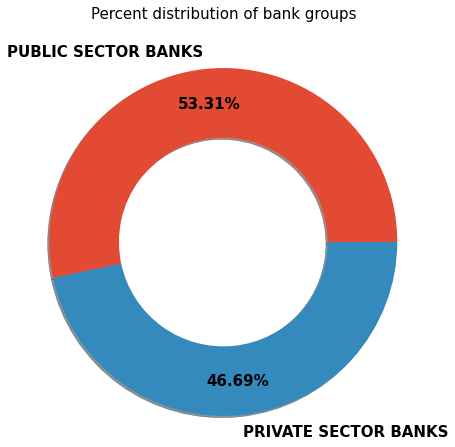

In [38]:
plt.pie(df.bankGrp.value_counts(),autopct='%0.2f%%',pctdistance=0.8,
        radius=2,shadow=True,
        labels=df.bankGrp.value_counts().index.tolist(),
        textprops={'fontsize':15}, wedgeprops={'width':0.8})
plt.title('Percent distribution of bank groups',size=15,y=1.5)
plt.show()

53.31% banks in our dataset are Public Sector banks and 46.69% are Private Sector Banks

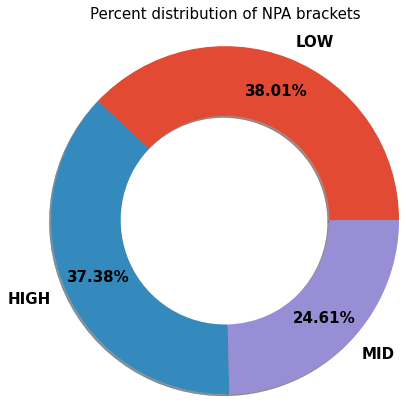

In [39]:
plt.pie(df.npaBins.value_counts(),autopct='%0.2f%%',pctdistance=0.8,
        radius=2,shadow=True, labels=df.npaBins.value_counts().index.tolist(),
        textprops={'fontsize':15}, wedgeprops={'width':0.8})
plt.title('Percent distribution of NPA brackets',size=15,y=1.4)
plt.show()

37.38% banks have high NNPA ratio, 24.61% banks have medium NNPA ratio, 38.01%  banks low NNPA ratio

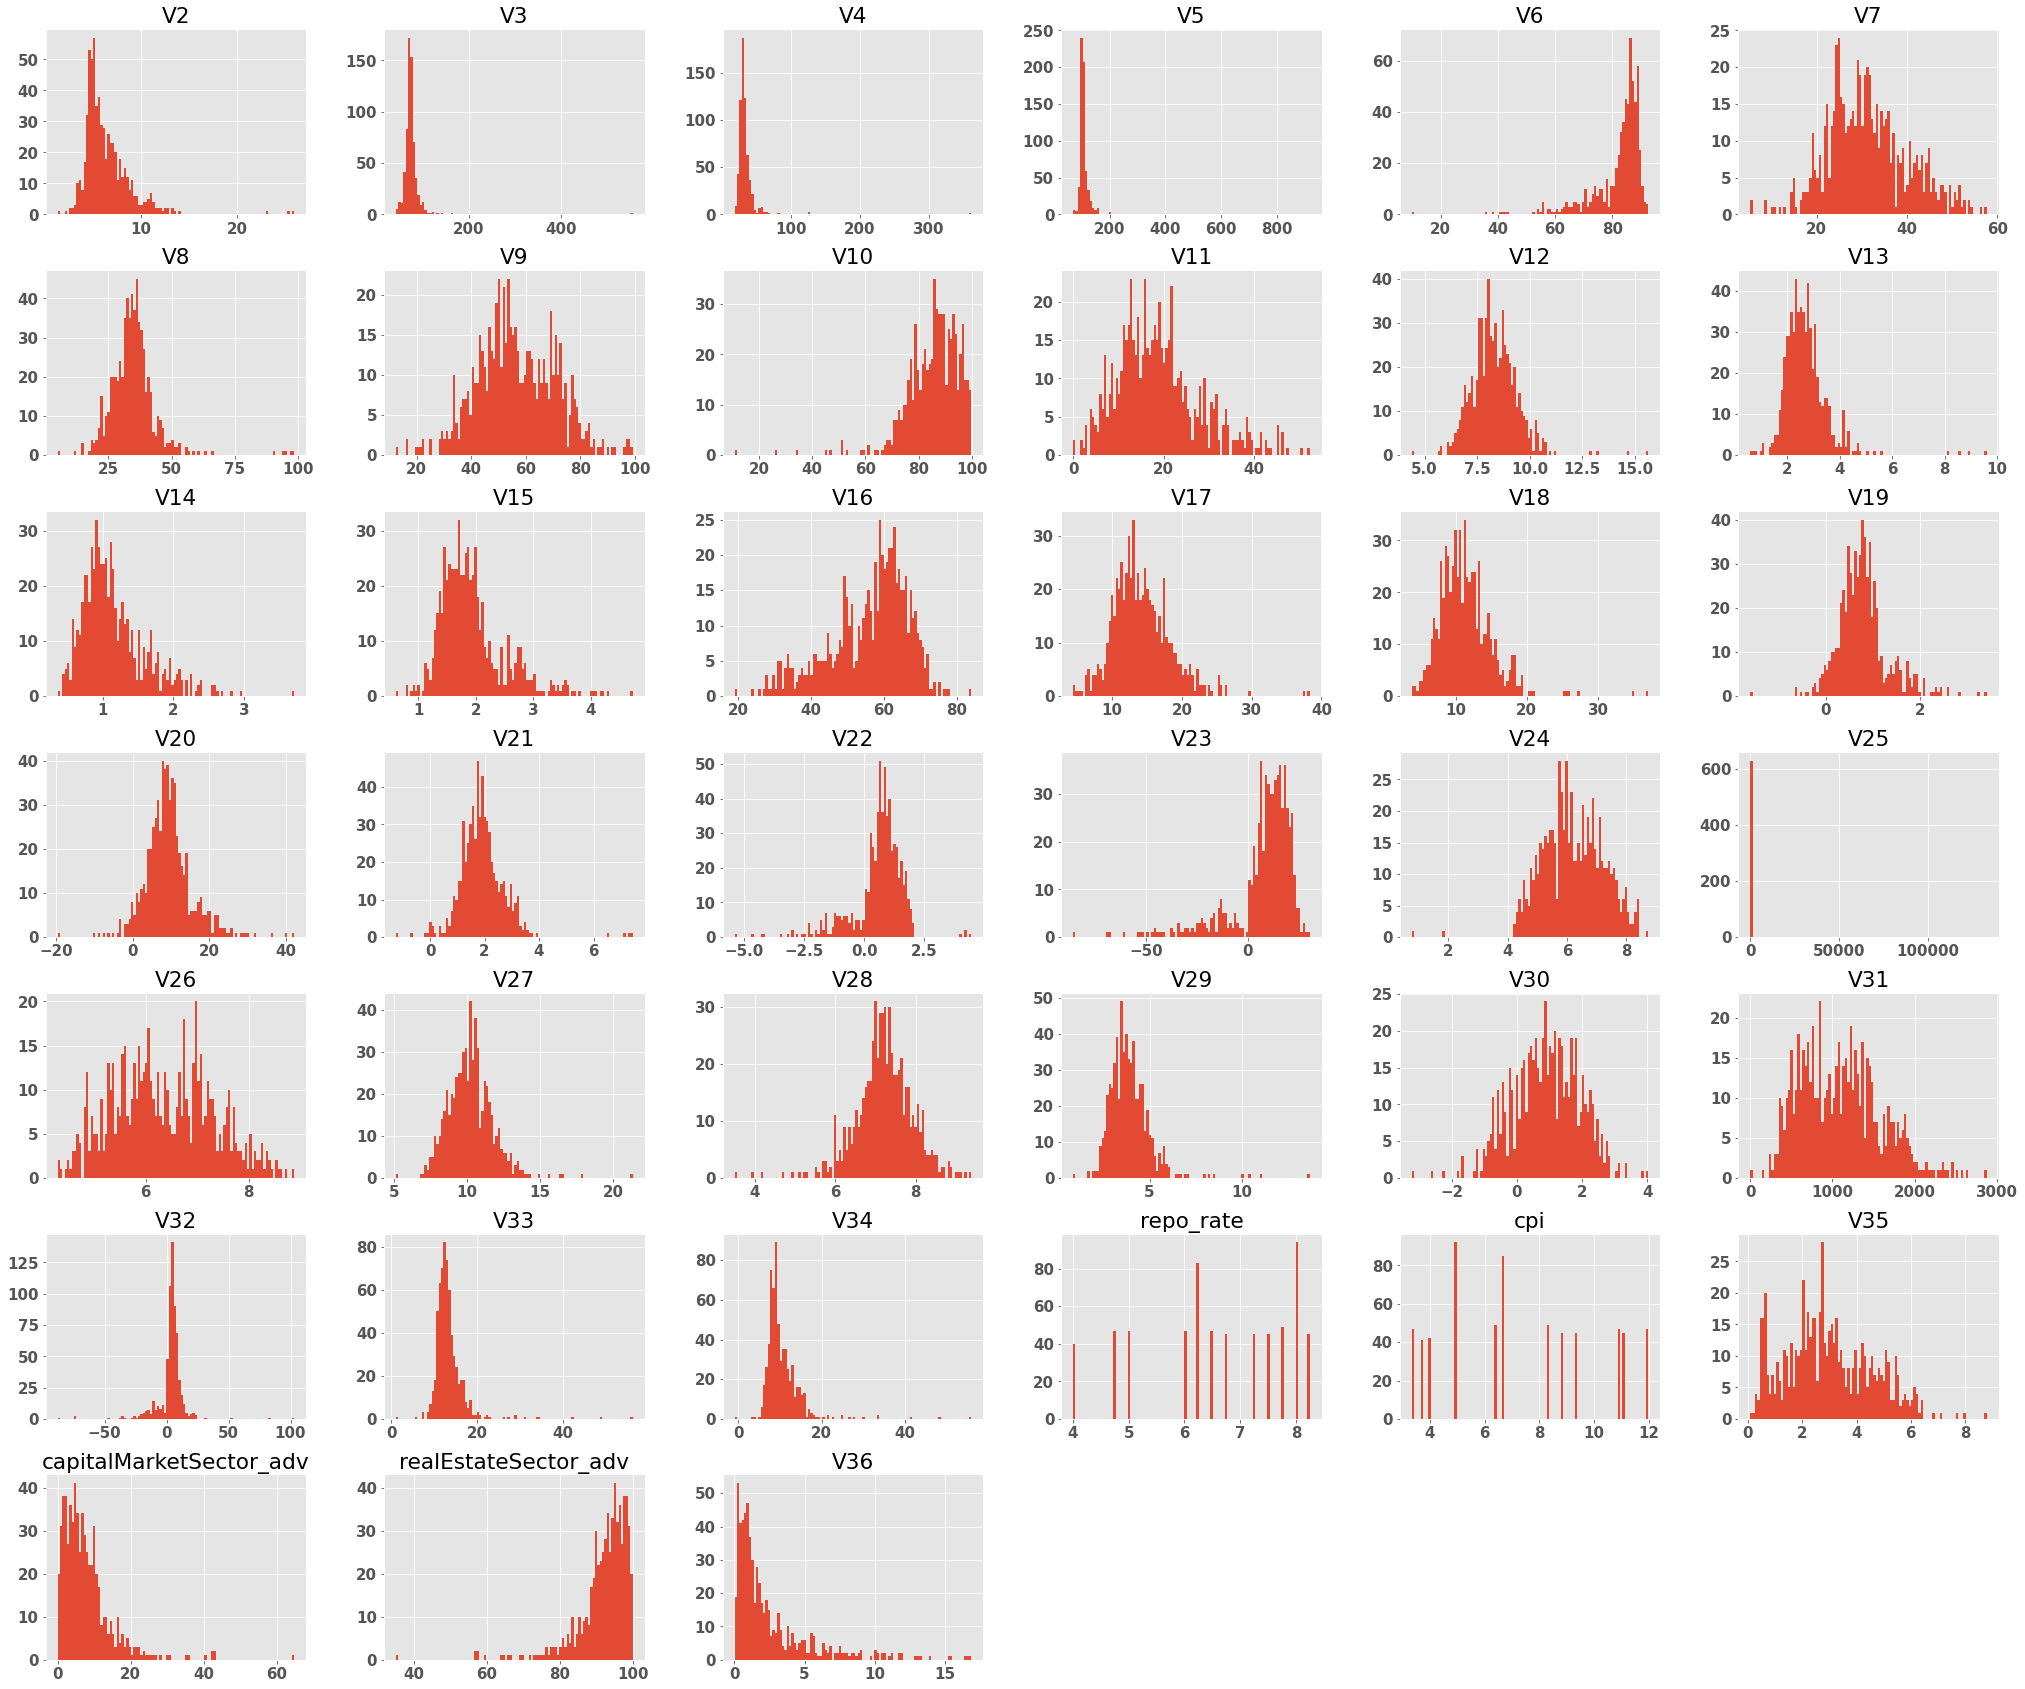

In [40]:
df.iloc[:,3:].hist(figsize=(35,30), bins=100)
plt.show()

V6(Ratio of deposits to total liabilities),V10(Ratio of secured advances to total advances), V22(Return on assets),V23(Return on equity), capitalMarketSector_adv, realEstateSector_adv are heavily skewed data.

Target variable V36(Net NPA ratio) is also right skewed

In [41]:
font={'size':20,'weight' : 'bold'}
matplotlib.rc(('font'),**font)

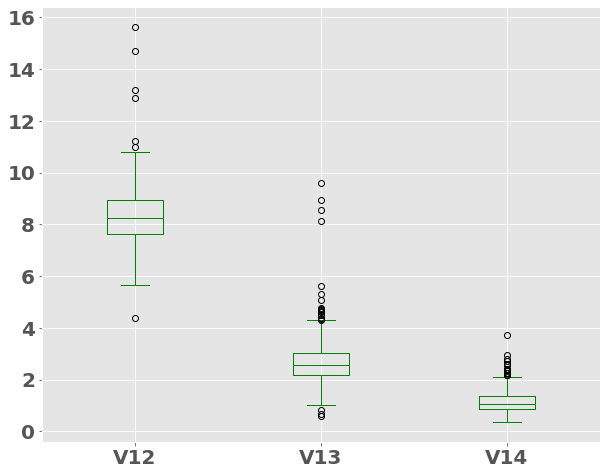

In [42]:
df.loc[:,['V12','V13','V14']].boxplot(figsize=(10,8),color='green')
plt.xticks(rotation=0)
plt.show()

'V12'(Ratio of interest income to total assets) , 

'V13'(Ratio of net interest income to total assets (Net Interest Margin)) , 

'V14'(Ratio of non-interest income to total assets)

Median of interest income is thrice the median of non interest income


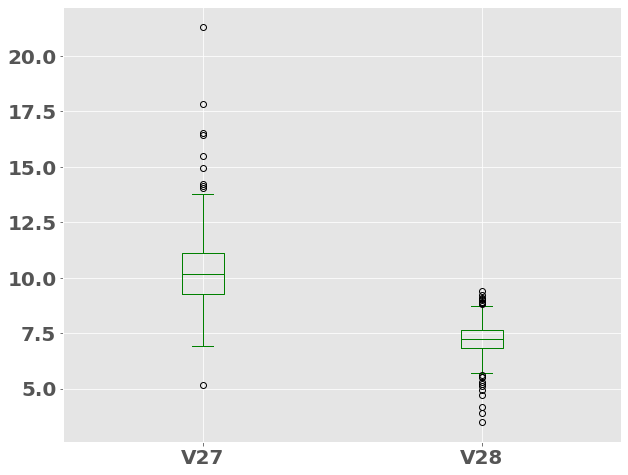

In [43]:
df.loc[:,['V27','V28']].boxplot(figsize=(10,8),color='green')
plt.show()

'V27'(Return on Advances) ,

'V28'(Return on investments) ,

Clearly return on advances has higher range compared to return on investment

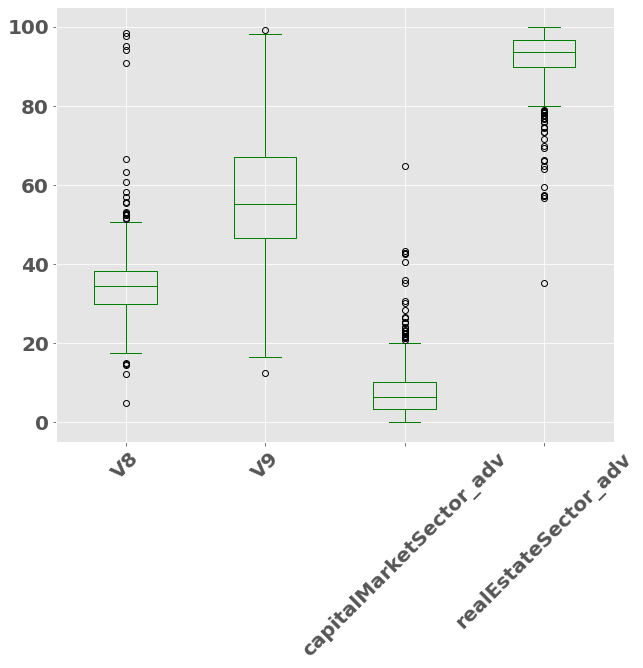

In [44]:
df.loc[:,['V8','V9','capitalMarketSector_adv','realEstateSector_adv']].boxplot(figsize=(10,8),color='green')
plt.xticks(rotation=45)
plt.show()

'V8'(Ratio of priority sector advances to total advances),

'V9'(Ratio of term loans to total advances),

'capitalMarketSector_adv'(Ratio of Capital Market Sector advances to total advances),

'realEstateSector_adv'(Ratio of Real Estate Sector advances to total advances),

Overall banks give more Real Estate Sector and least to Capital Market Sector

## BIVARIATE ANALYSIS

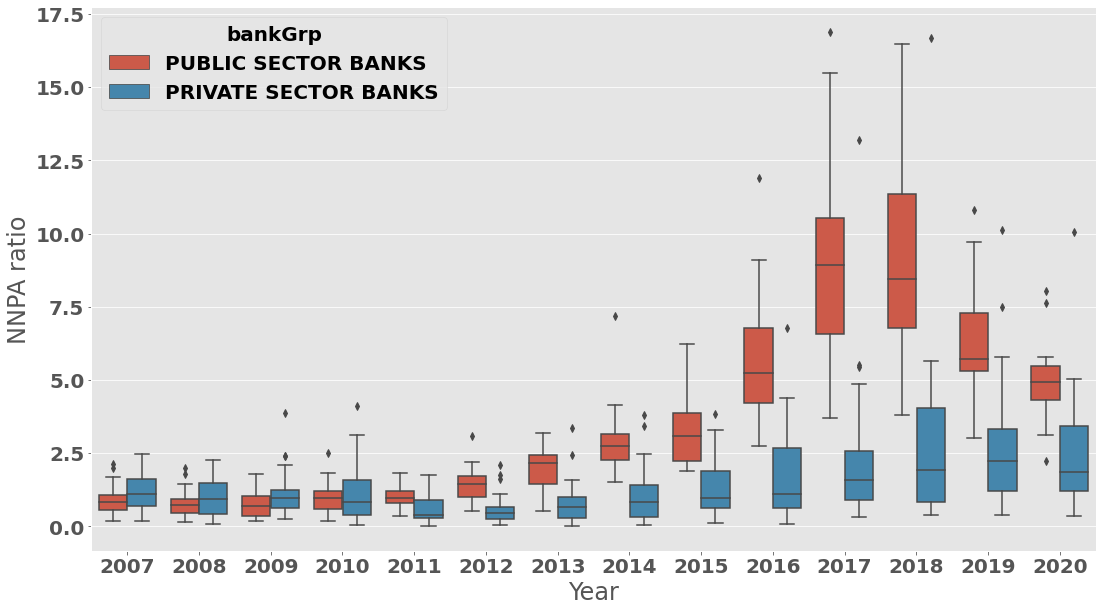

In [45]:
plt.figure(figsize=(18,10))
sns.boxplot(y='V36', hue='bankGrp',x='V0', data=df)
plt.xlabel('Year')
plt.ylabel('NNPA ratio')
plt.xticks(rotation=0)
plt.show()

Median and range of NNPA ratio for PUBLIC SECTOR BANK is increasing with year while for PRIVATE SECTOR BANKS range has increased but is almost same over the years. 

PUBLIC SECTOR BANKS NNPA ratio are in in higher range compared to PRIVATE SECTOR BANKS

Let's see what is the count of banks with LOW, MID and HIGH NNPA ratio sector wise

In [46]:
df_npa_freq_perc=pd.DataFrame(df.groupby('bankGrp').npaBins.value_counts()).rename(columns={'npaBins':'freq'}).reset_index()
df_npa_freq_perc.loc[0:2,['freq']] = df_npa_freq_perc.loc[0:2,['freq']]/df_npa_freq_perc.loc[0:2,'freq'].sum()*100
df_npa_freq_perc.loc[3:,['freq']] = df_npa_freq_perc.loc[3:,['freq']]/df_npa_freq_perc.loc[3:,'freq'].sum()*100
df_npa_freq_perc

,bankGrp,npaBins,freq
0,PRIVATE SECTOR BANKS,LOW,49.662162
1,PRIVATE SECTOR BANKS,MID,27.027027
2,PRIVATE SECTOR BANKS,HIGH,23.310811
3,PUBLIC SECTOR BANKS,HIGH,49.704142
4,PUBLIC SECTOR BANKS,LOW,27.810651
5,PUBLIC SECTOR BANKS,MID,22.485207


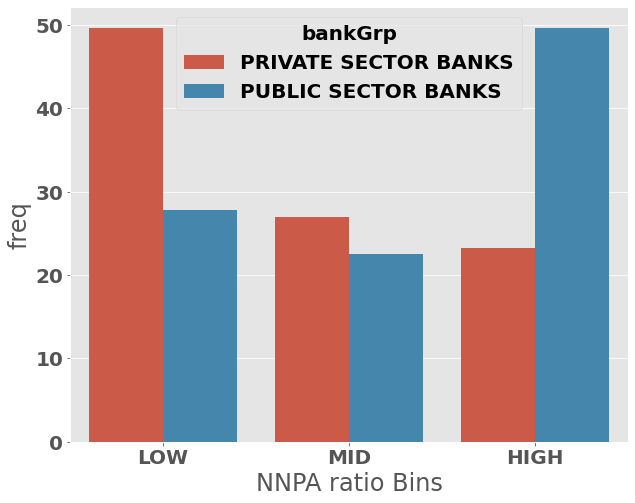

In [47]:
plt.figure(figsize=(10,8))
sns.barplot(y='freq',x='npaBins',hue='bankGrp',data=df_npa_freq_perc)
plt.xlabel('NNPA ratio Bins')
plt.show()

PUBLIC SECTOR BANK GROUP has more banks with HIGH NNPA ratio while PRIVATE SECTOR group has more bank with LOW NNPA ratio

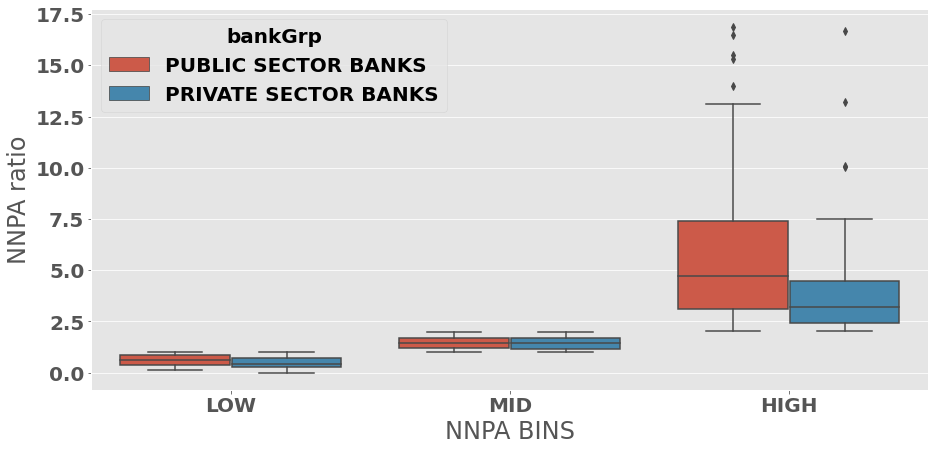

In [48]:
plt.figure(figsize=(15,7))
sns.boxplot(y='V36', hue='bankGrp',x='npaBins', data=df,)
plt.ylabel('NNPA ratio')
plt.xlabel('NNPA BINS')
plt.xticks(rotation=0)
plt.show()

Comparing banks with high NNPA ratio for both PUBLIC and PRIVATE SECTOR GROUP
it can be seen median and range of NNPA ratio for banks in PUBLIC SECTOR BANK GROUP is much higher as compared to banks in PRIVATE SECTOR BANK GROUP

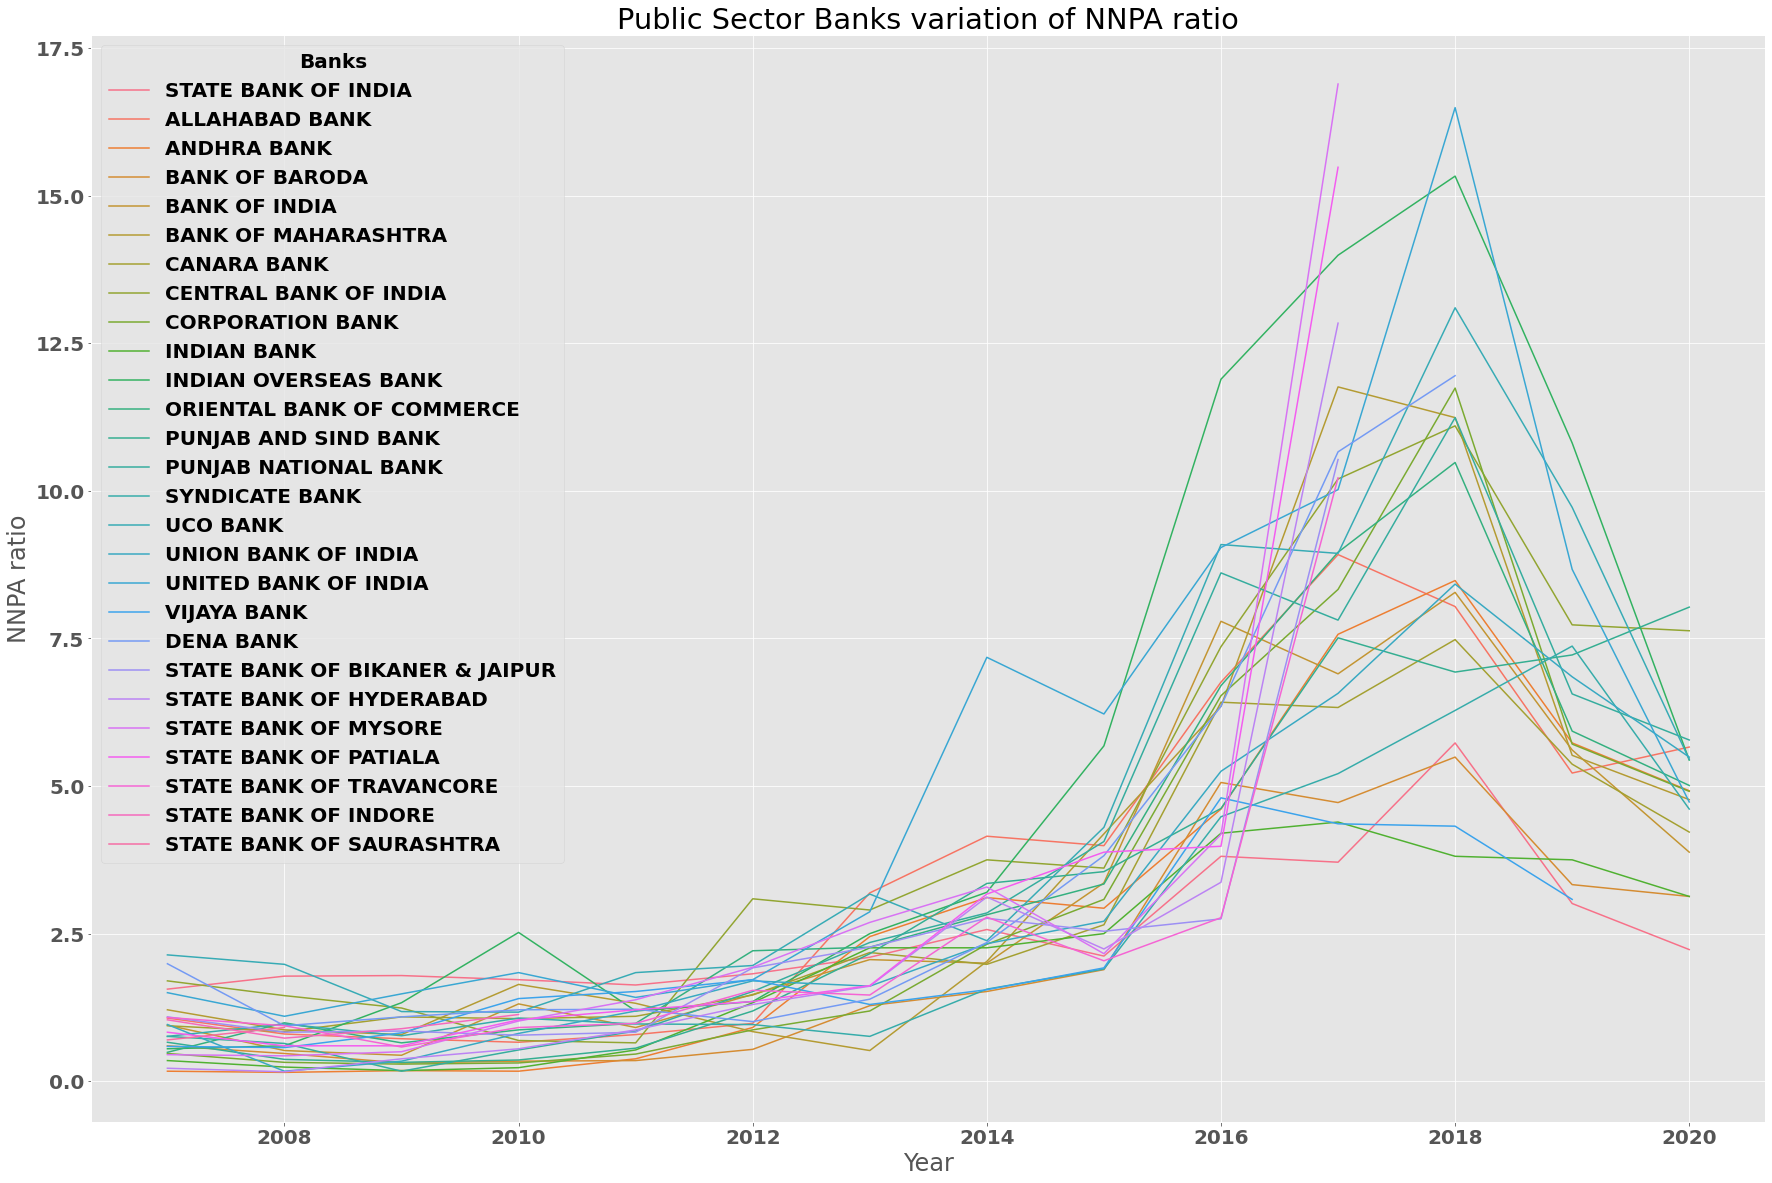

In [49]:
plt.figure(figsize=(30,20))
sns.lineplot(x='V0',y='V36',hue='V1' ,data=df[df.bankGrp=='PUBLIC SECTOR BANKS'])
plt.title('Public Sector Banks variation of NNPA ratio')
plt.xlabel('Year')
plt.ylabel('NNPA ratio')
plt.legend(title='Banks')
plt.show()

Over the year Public Sector Banks have increasing trend of NNPA ratio. From 2015 till 2018 increament is very sharp. After that NNPA ratio has decreased but still they all are in HIGH NNPA ratio bracket

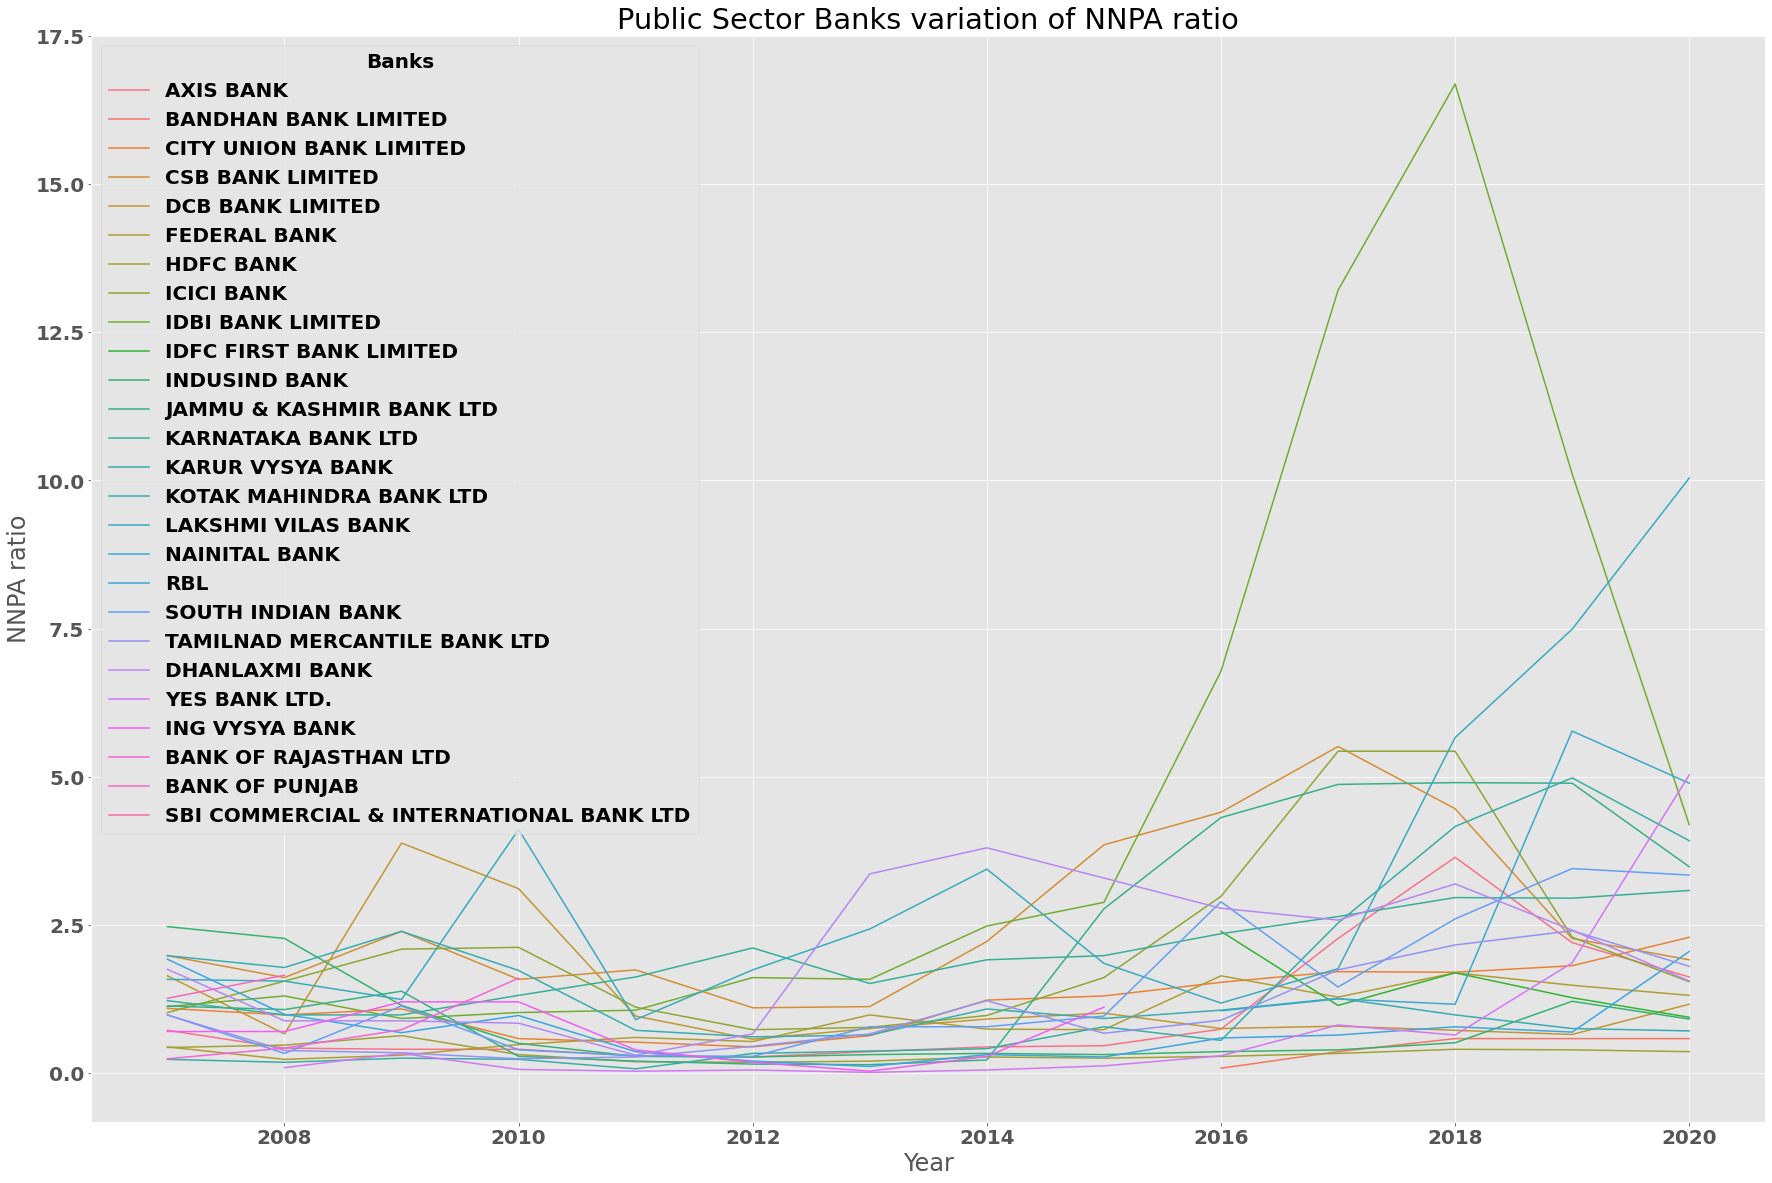

In [50]:
plt.figure(figsize=(30,20))
sns.lineplot(x='V0',y='V36',hue='V1' ,data=df[df.bankGrp=='PRIVATE SECTOR BANKS'])
plt.title('Public Sector Banks variation of NNPA ratio')
plt.xlabel('Year')
plt.ylabel('NNPA ratio')
plt.legend(title='Banks')
plt.show()

Unlike Public Sector Banks, Private Sector Banks NNPA ratio has no increasing trend. Also for most of the Private Sector Banks their NNPA ratio fall under MID or LOW NNPA ratio bracket.

**Conclusion:**
Recovery of loan in Private Sector Banks in better as compared to Public Sector Banks

## MULTIVARIATE

In [52]:
# Function to plot scatter plot of a particular column vs NNPA ratio

def scatter_plot(X_, xlabel):
    """
    function plots the scatter plot of X_ against NNPA ratio for group of banks
    belonging to different categories
    Category 1: 'PUBLIC SECTOR BANKS'  and 'HIGH NNPA RATIO
    Category 2: 'PUBLIC SECTOR BANKS'  and 'MID  NNPA RATIO
    Category 3: 'PUBLIC SECTOR BANKS'  and 'MID  NNPA RATIO
    Category 4: 'PRIVATE SECTOR BANKS' and 'HIGH NNPA RATIO
    Category 5: 'PRIVATE SECTOR BANKS' and 'MID  NNPA RATIO
    Category 6: 'PRIVATE SECTOR BANKS' and 'LOW  NNPA RATIO

    X_ : column name for x axis of scatter plot
    xlabel: x -axis label for scatter plot
    """
    fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(30,17))
    sns.regplot(x=X_,y='V36',
                data=df[(df.bankGrp=='PUBLIC SECTOR BANKS')&(df.npaBins=='HIGH')],
                ax=axs[0,0]).set_title('HIGH NNPA ratio')
    
    axs[0,0].set_ylabel('NNPA ratio')
    axs[0,0].set_xlabel(None)
    
    sns.regplot(x=X_,y='V36',
                data=df[(df.bankGrp=='PUBLIC SECTOR BANKS')&(df.npaBins=='MID')],
                ax=axs[0,1]).set_title('MID NNPA ratio')
    
    axs[0,1].set_ylabel(None)
    axs[0,1].set_xlabel(None)

    
    sns.regplot(x=X_,y='V36',
                data=df[(df.bankGrp=='PUBLIC SECTOR BANKS')&(df.npaBins=='LOW')],
                ax=axs[0,2]).set_title('LOW NNPA ratio')
    axs[0,2].yaxis.set_label_position('right')
    axs[0,2].set_ylabel('Public Sector Banks')
    axs[0,2].set_xlabel(None)

    sns.regplot(x=X_,y='V36',
                data=df[(df.bankGrp=='PRIVATE SECTOR BANKS')&(df.npaBins=='HIGH')],
                ax=axs[1,0])
    axs[1,0].set_ylabel('NNPA ratio')
    axs[1,0].set_xlabel(xlabel)
    
    sns.regplot(x=X_,y='V36',
                data=df[(df.bankGrp=='PRIVATE SECTOR BANKS')&(df.npaBins=='MID')],
                ax=axs[1,1])
    axs[1,1].set_ylabel(None)
    axs[1,1].set_xlabel(xlabel)
    
    sns.regplot(x=X_,y='V36',
                data=df[(df.bankGrp=='PRIVATE SECTOR BANKS')&(df.npaBins=='LOW')],
                ax=axs[1,2])
    
    axs[1,2].yaxis.set_label_position('right')
    axs[1,2].set_ylabel('Private Sector Banks')
    axs[1,2].set_xlabel(xlabel)
    
    plt.show()

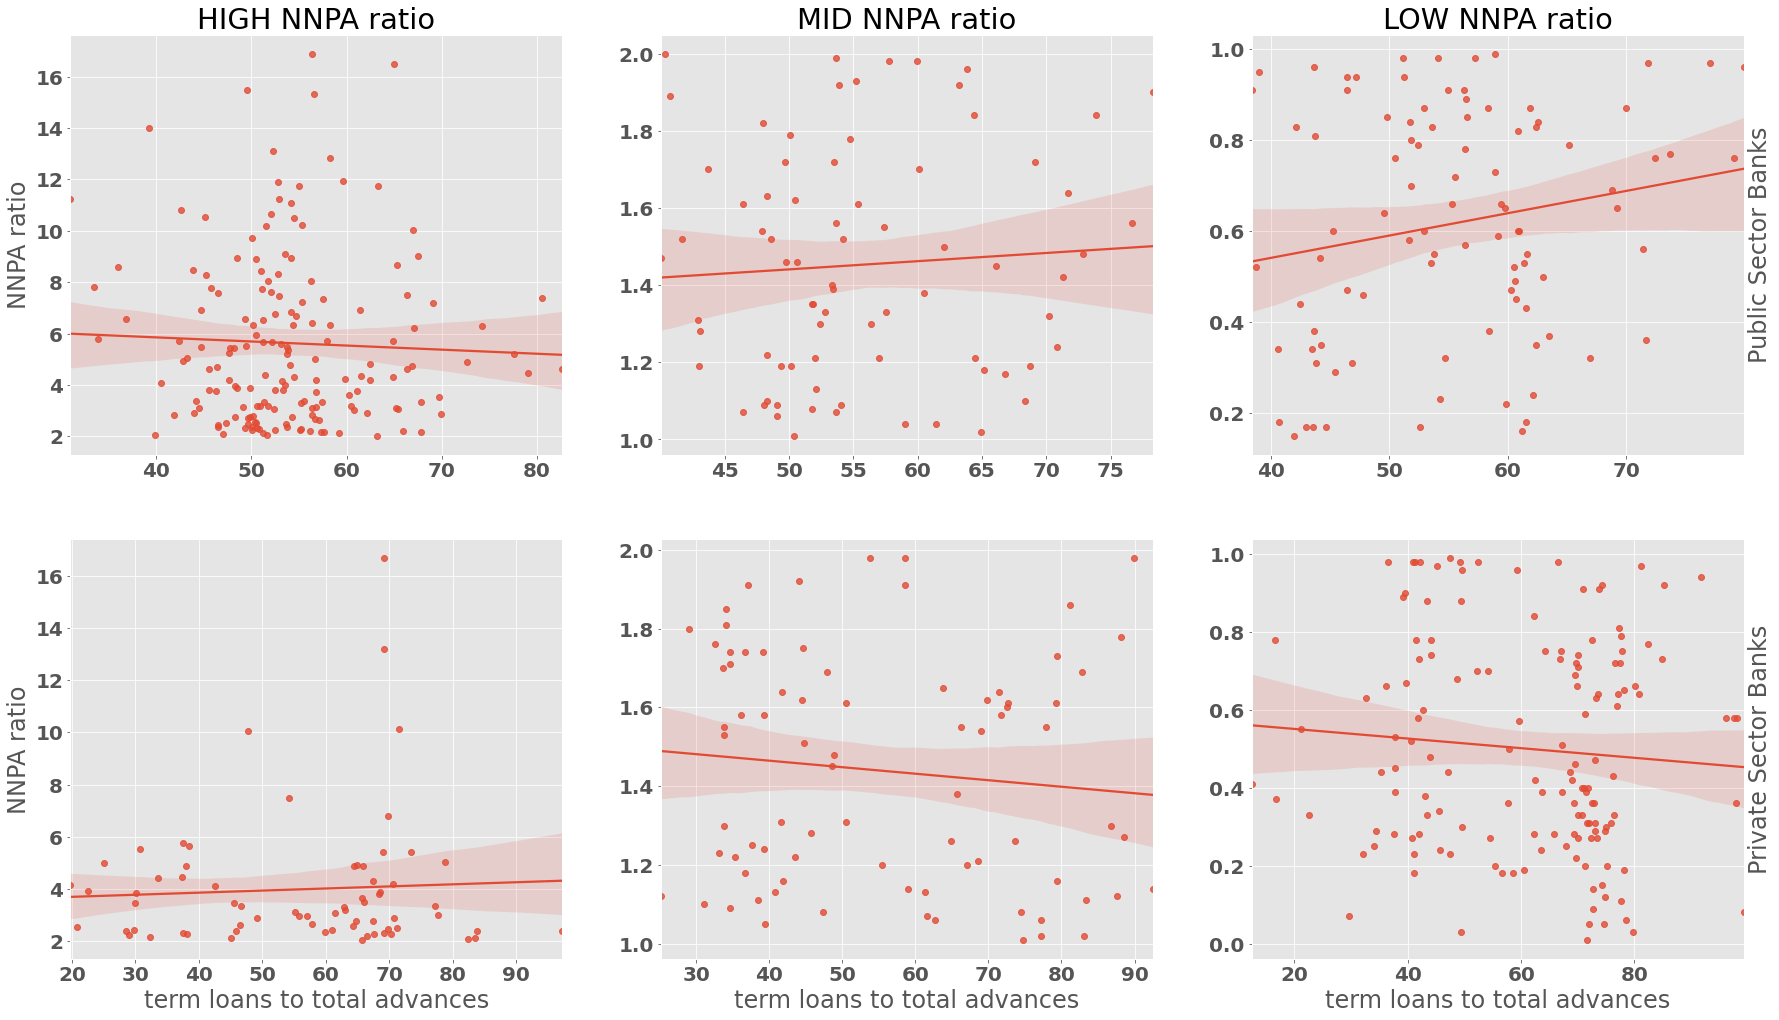

In [53]:
scatter_plot("V9", 'term loans to total advances')

Term loan to total advance ratio has no trend  with HIGH NNPA ratio for both PUBLIC and PRIVATE SECTOR BANK GROUP

In the MID range NNPA ratio it has slight increasing trend for PUBLIC SECTOR BANKS while slight decreasing for PRIVATE SECTOR BANKS.

In the LOW range NNPA ratio it has increasing trend for PUBLIC SECTOR BANKS while slight decreasing for PRIVATE SECTOR BANKS.

Over all if PUBLIC SECTOR BANKS lend more term loans then there NNPA will increase only in LOW range

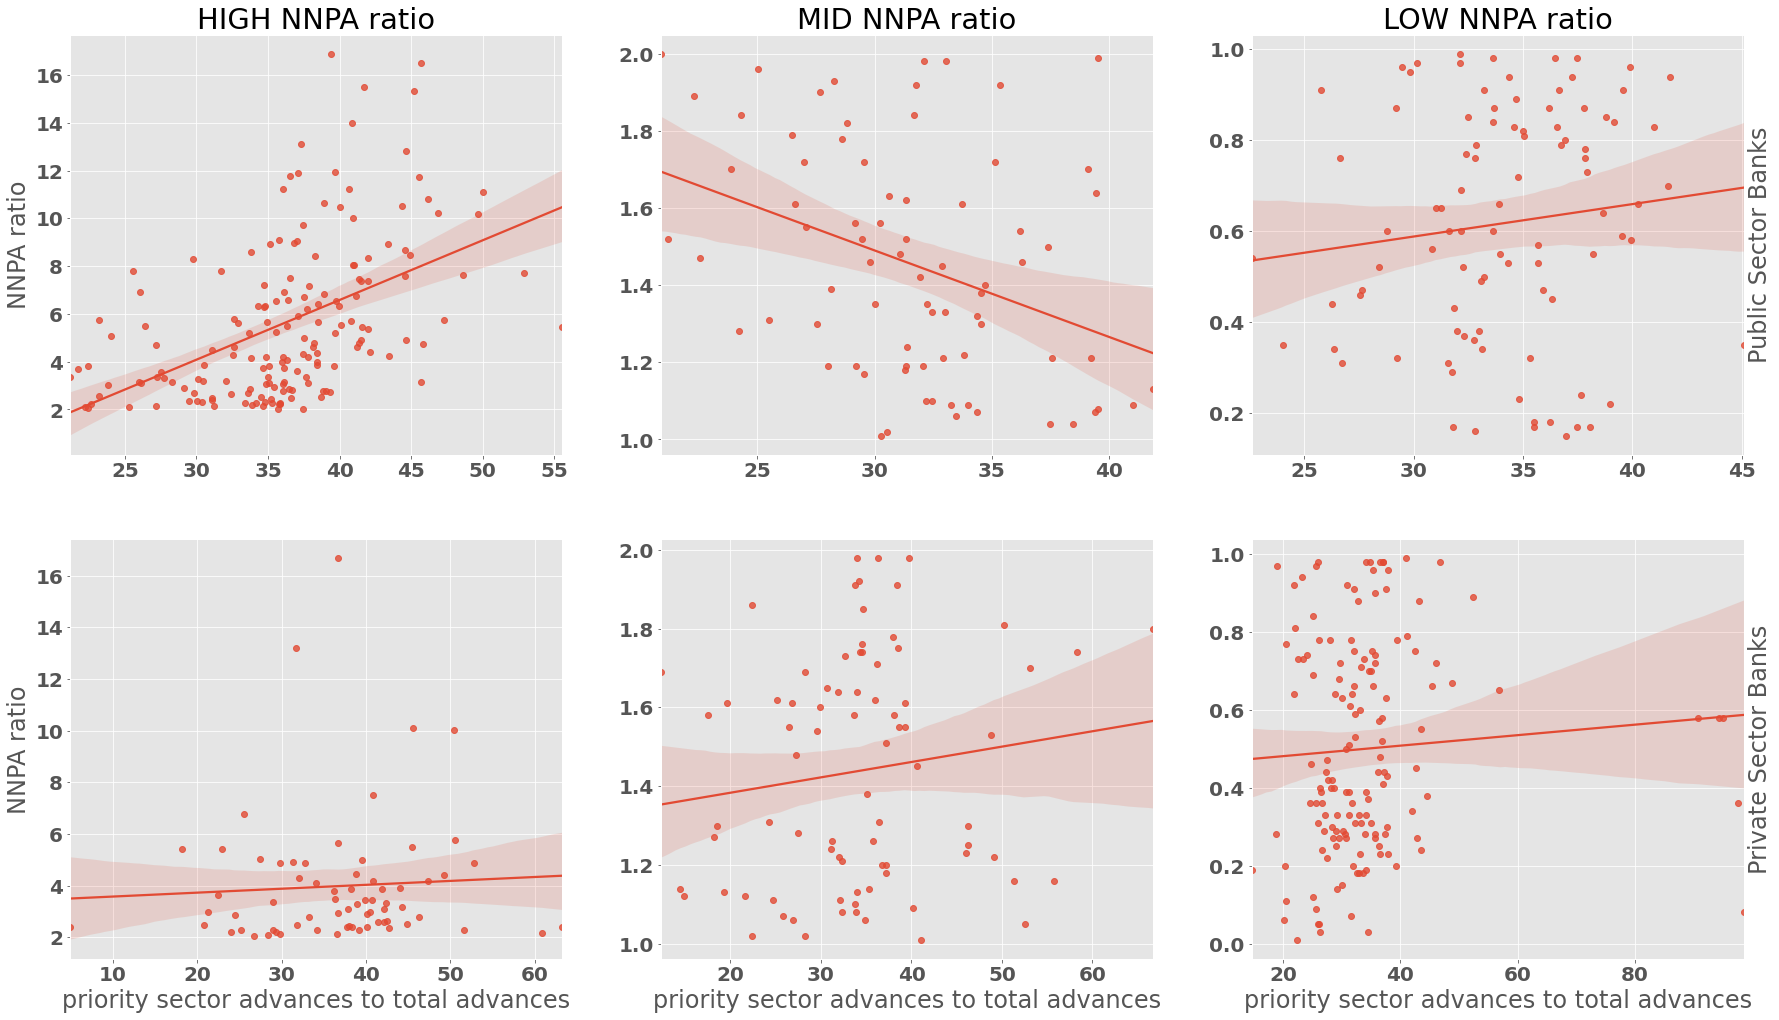

In [54]:
scatter_plot('V8',"priority sector advances to total advances")

NNPA ratio for banks with HIGH NNPA ratio in PUBLIC SECTOR BANK group increases quite significantly with increase in loan to priority sectors. This means for them more loan get default in priority sector.

NNPA ratio for banks with MID NNPA ratio in PUBLIC SECTOR BANK group decreases quite significantly with increase in loan to priority sectors. This means these banks are efficient in recovering loan/NPA from priority sector.

For PRIVATE SECTOR BANK group there is not much trend between NNPA ratio and loan to priority sector.

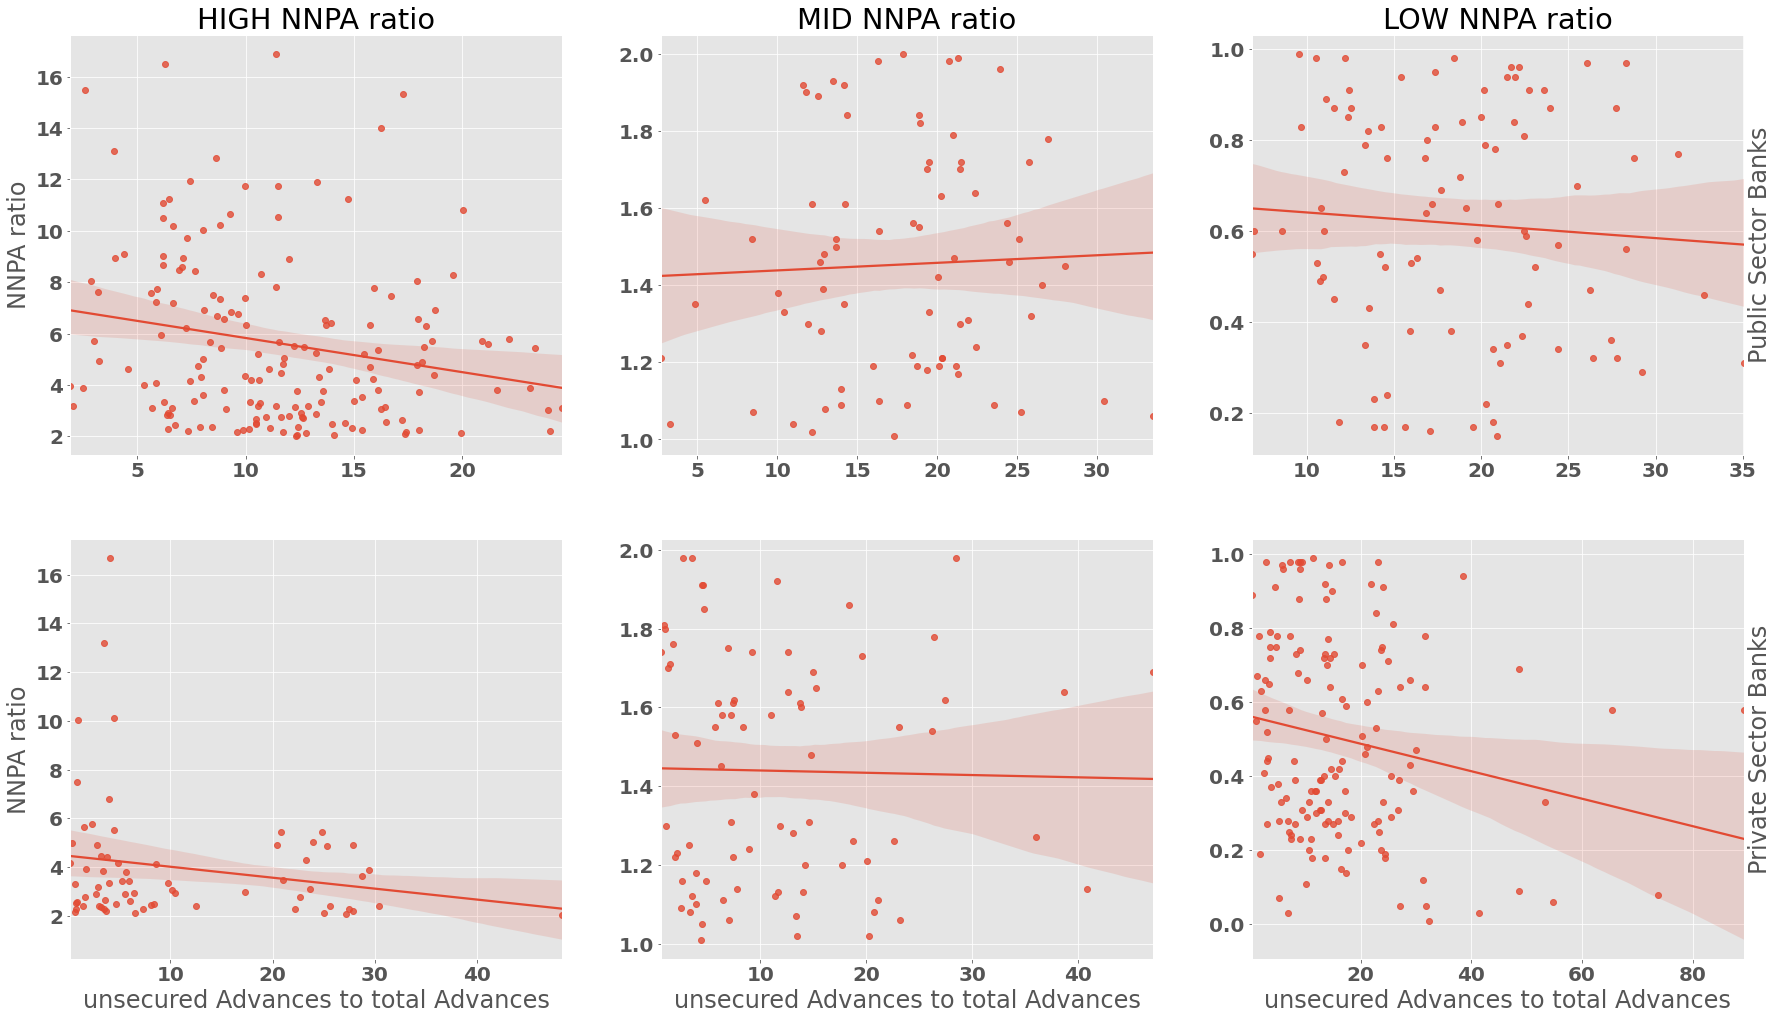

In [55]:
df.insert(loc=6,value=0,column="unsecuredAdvances_totalAdvances")
df["unsecuredAdvances_totalAdvances"] = 100-df.V10
scatter_plot("unsecuredAdvances_totalAdvances","unsecured Advances to total Advances")

NNPA ratio for banks with HIGH NNPA ratio in both PRIVATE and PUBLIC SECTOR BANK group and LOW NNPA ratio in PRIVATE SECTOR BANK group decreases moderately with increase in unsecured loans. 

This means for these banks loan recovery is good for unsecured loans. It also indicates bank put more effort and resources in recovering unsecured loan.

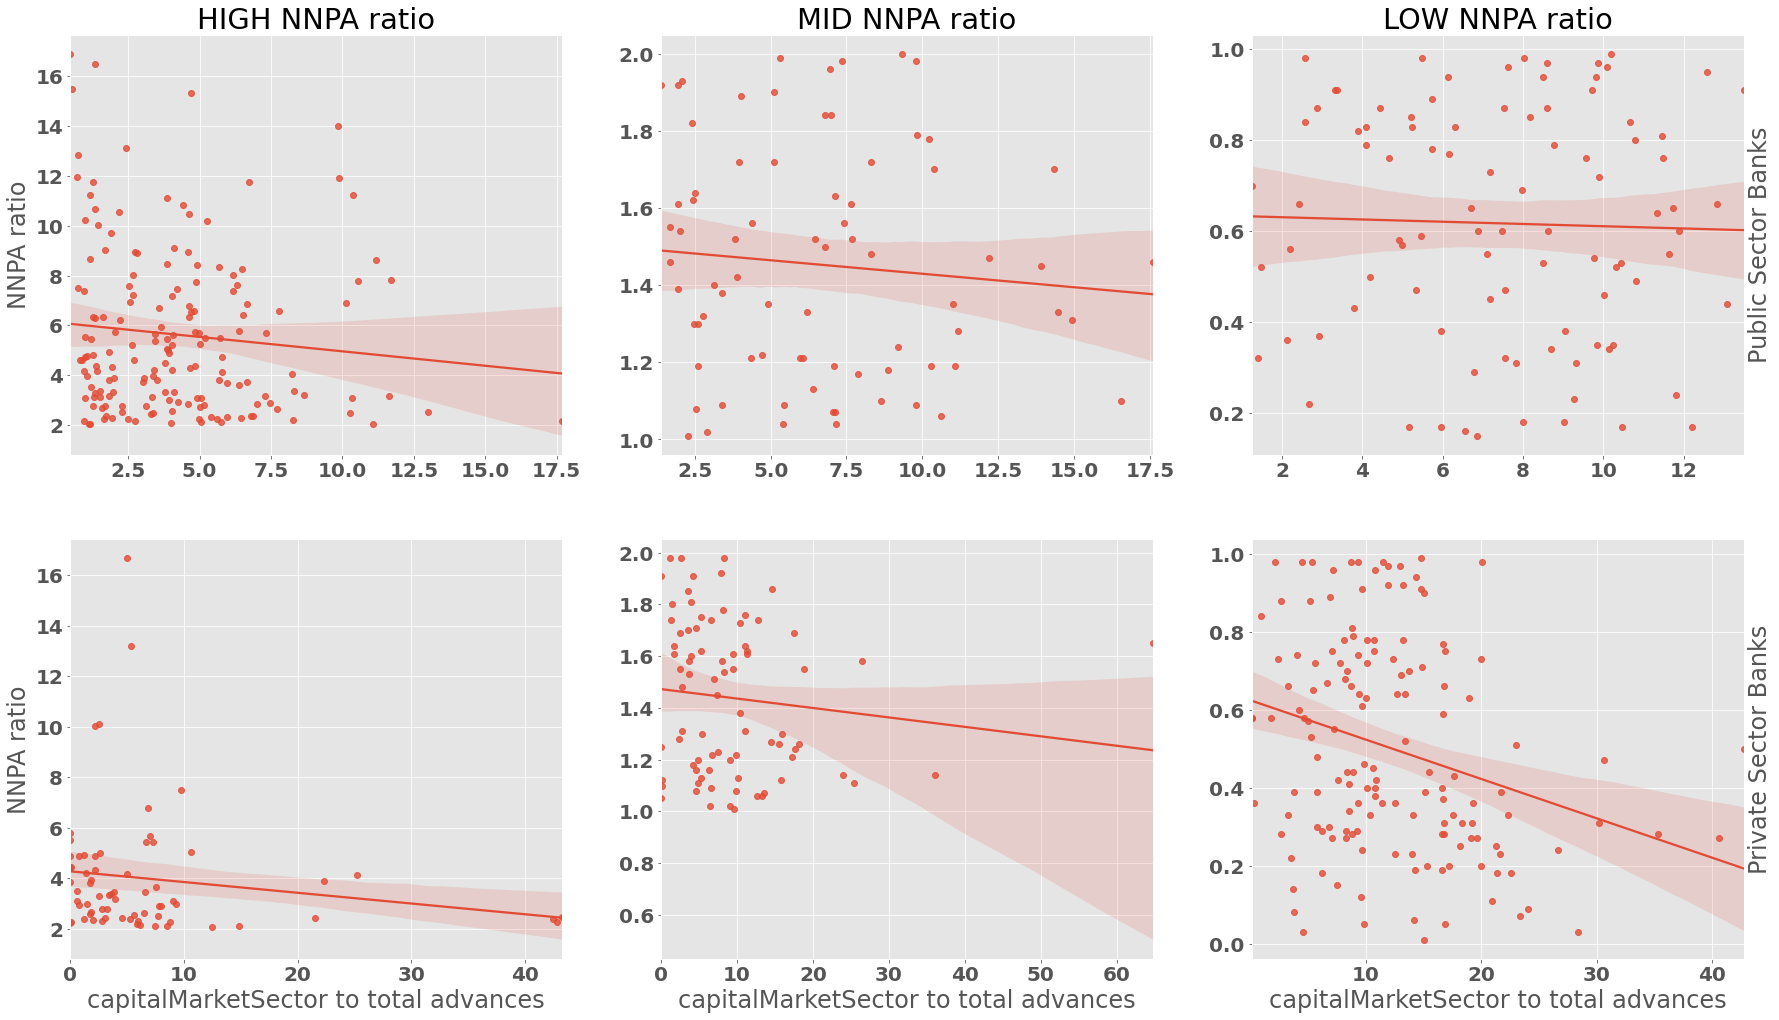

In [56]:
scatter_plot('capitalMarketSector_adv','capitalMarketSector to total advances')

Banks with LOW NNPA ratio in PRIVATE SECTOR BANK GROUP has significant decrease in NNPA ratio with increase in loan to Capital market sector. It means for these banks loan recovery from this sector is good. For rest of the categories there is not much trend

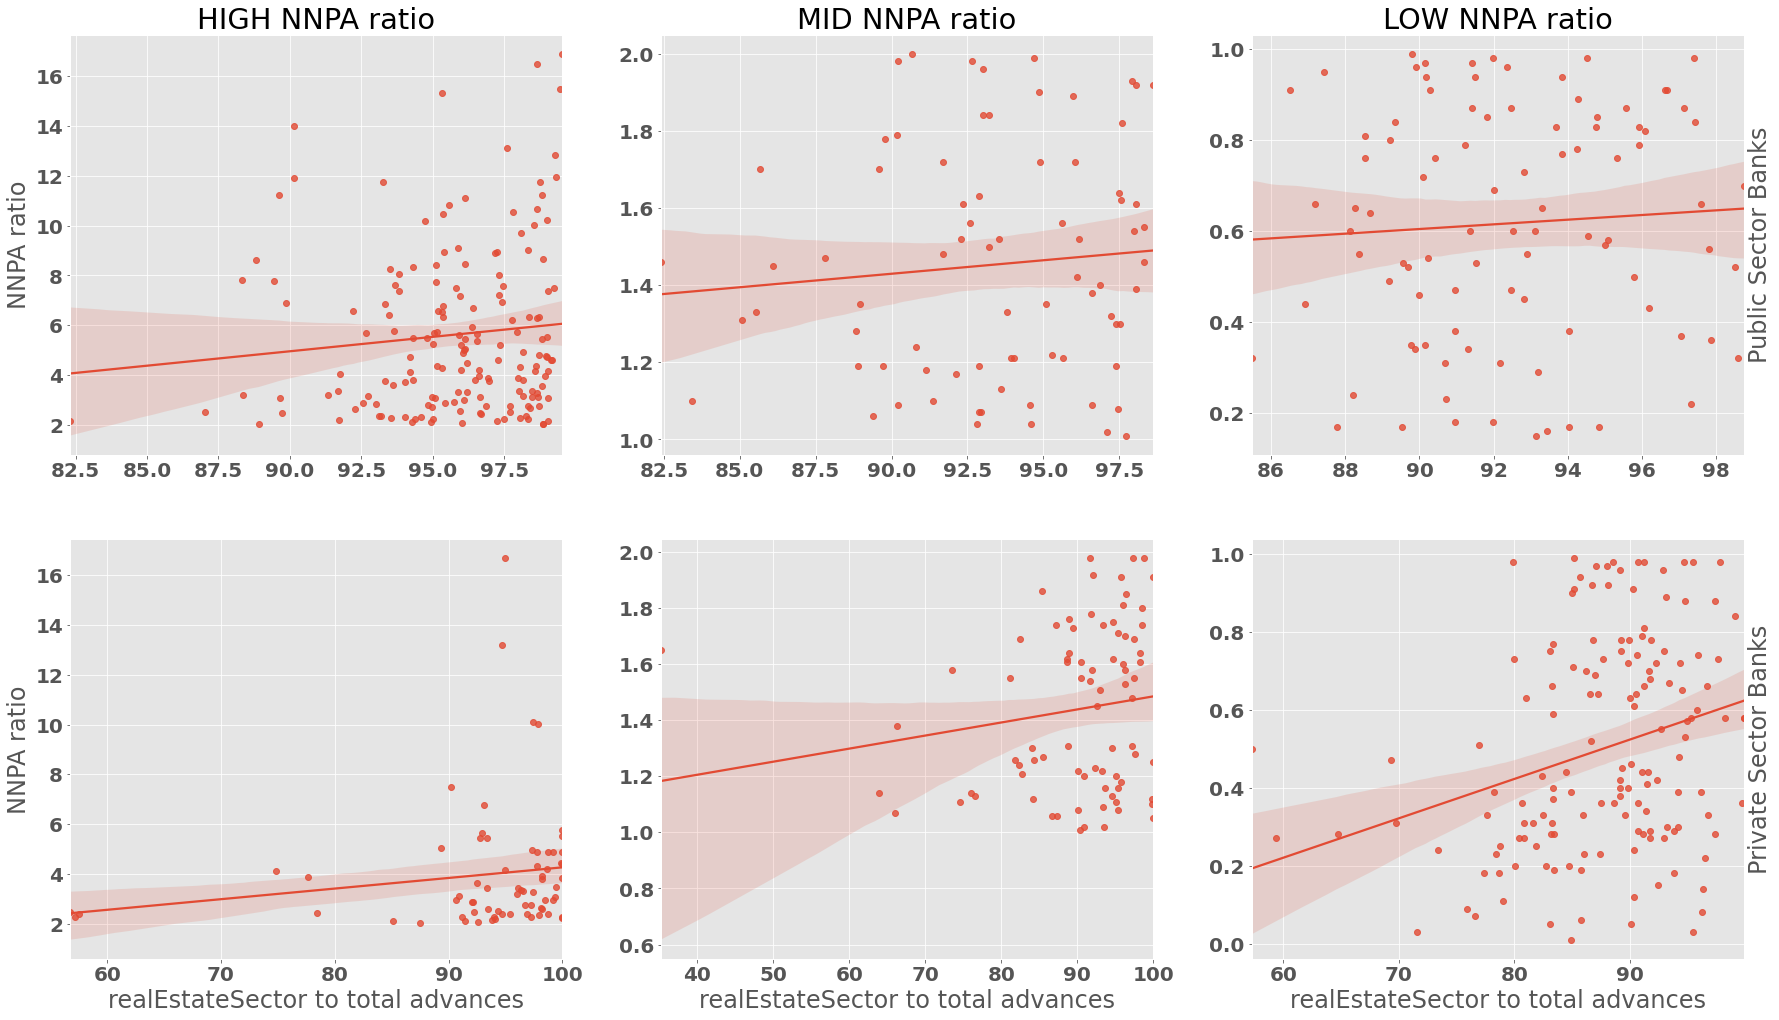

In [57]:
scatter_plot('realEstateSector_adv','realEstateSector to total advances')

Banks with LOW NNPA ratio in PRIVATE SECTOR BANK GROUP has significant increase in NNPA ratio with increase in loan to Real Estate sector. It means for these banks there are more loan default cases from Real Estate.

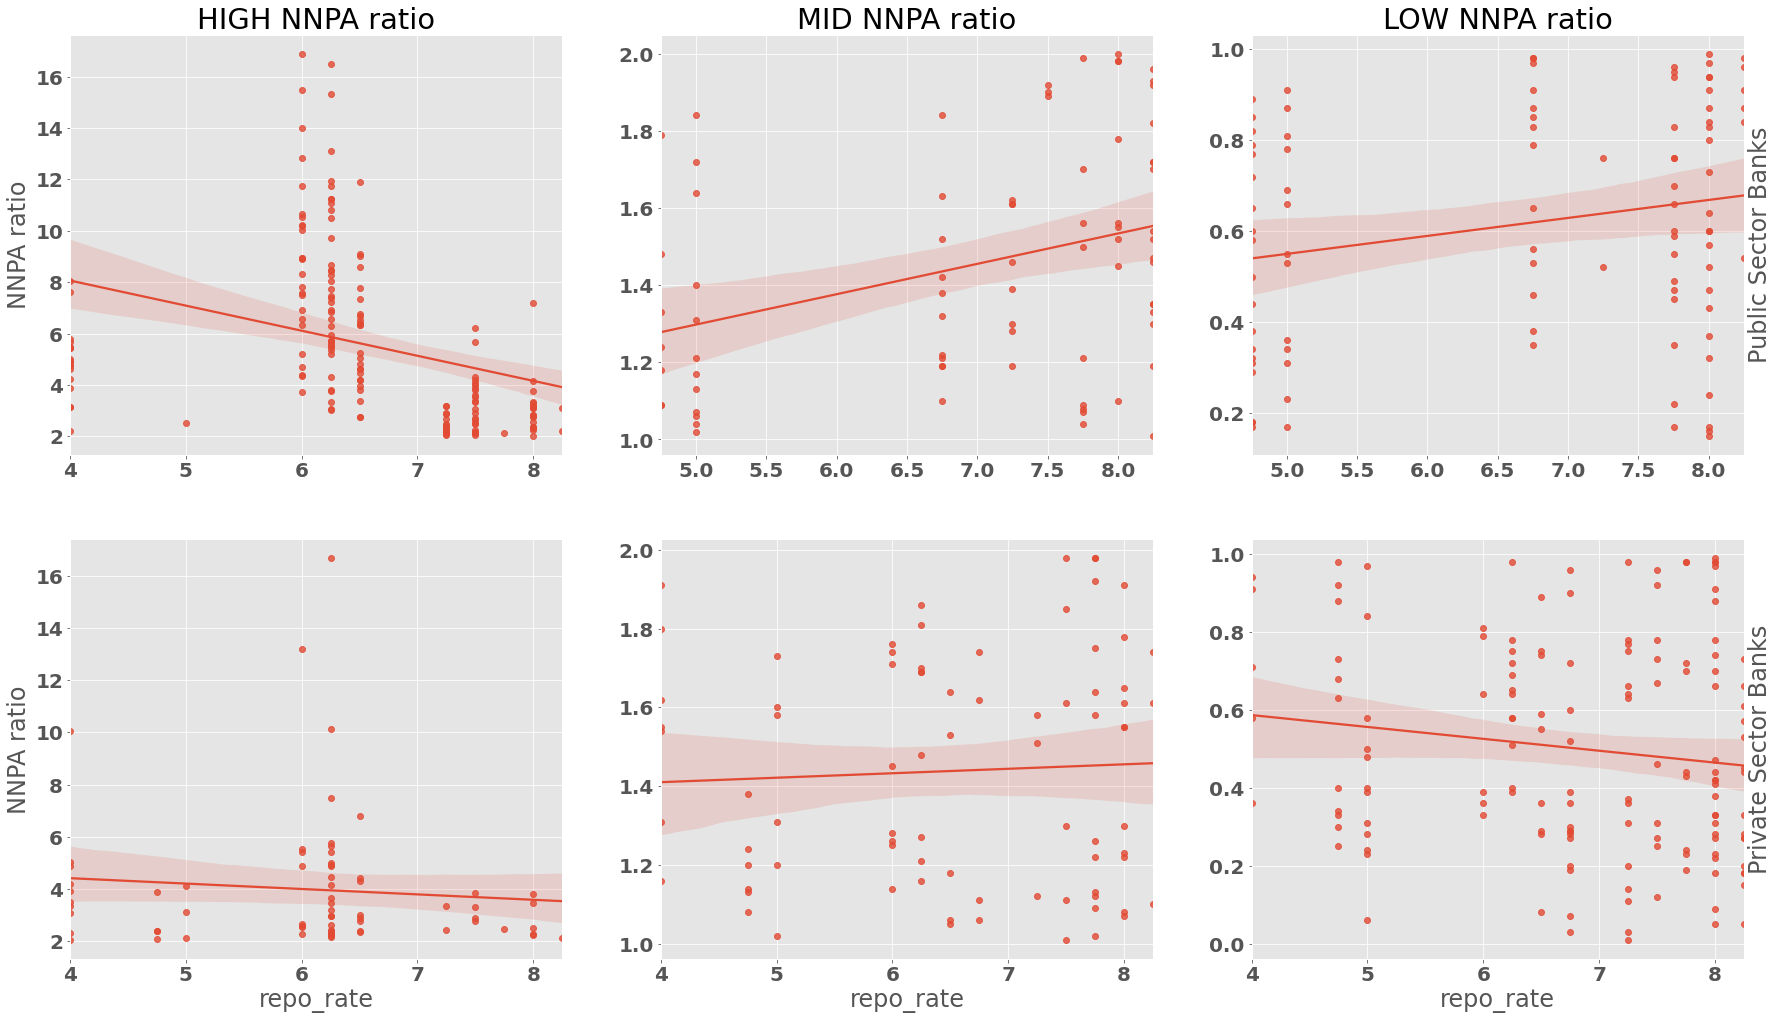

In [58]:
scatter_plot("repo_rate",'repo_rate')

Banks falling in HIGH NNPA ratio bracket in PUBLIC SECTOR BANK GROUP has significant decreasing trend in NNPA ratio with increase in repo rate while for banks falling in MID NNPA ratio bracket in the same group NNPA ratio increases with increase in repo rate

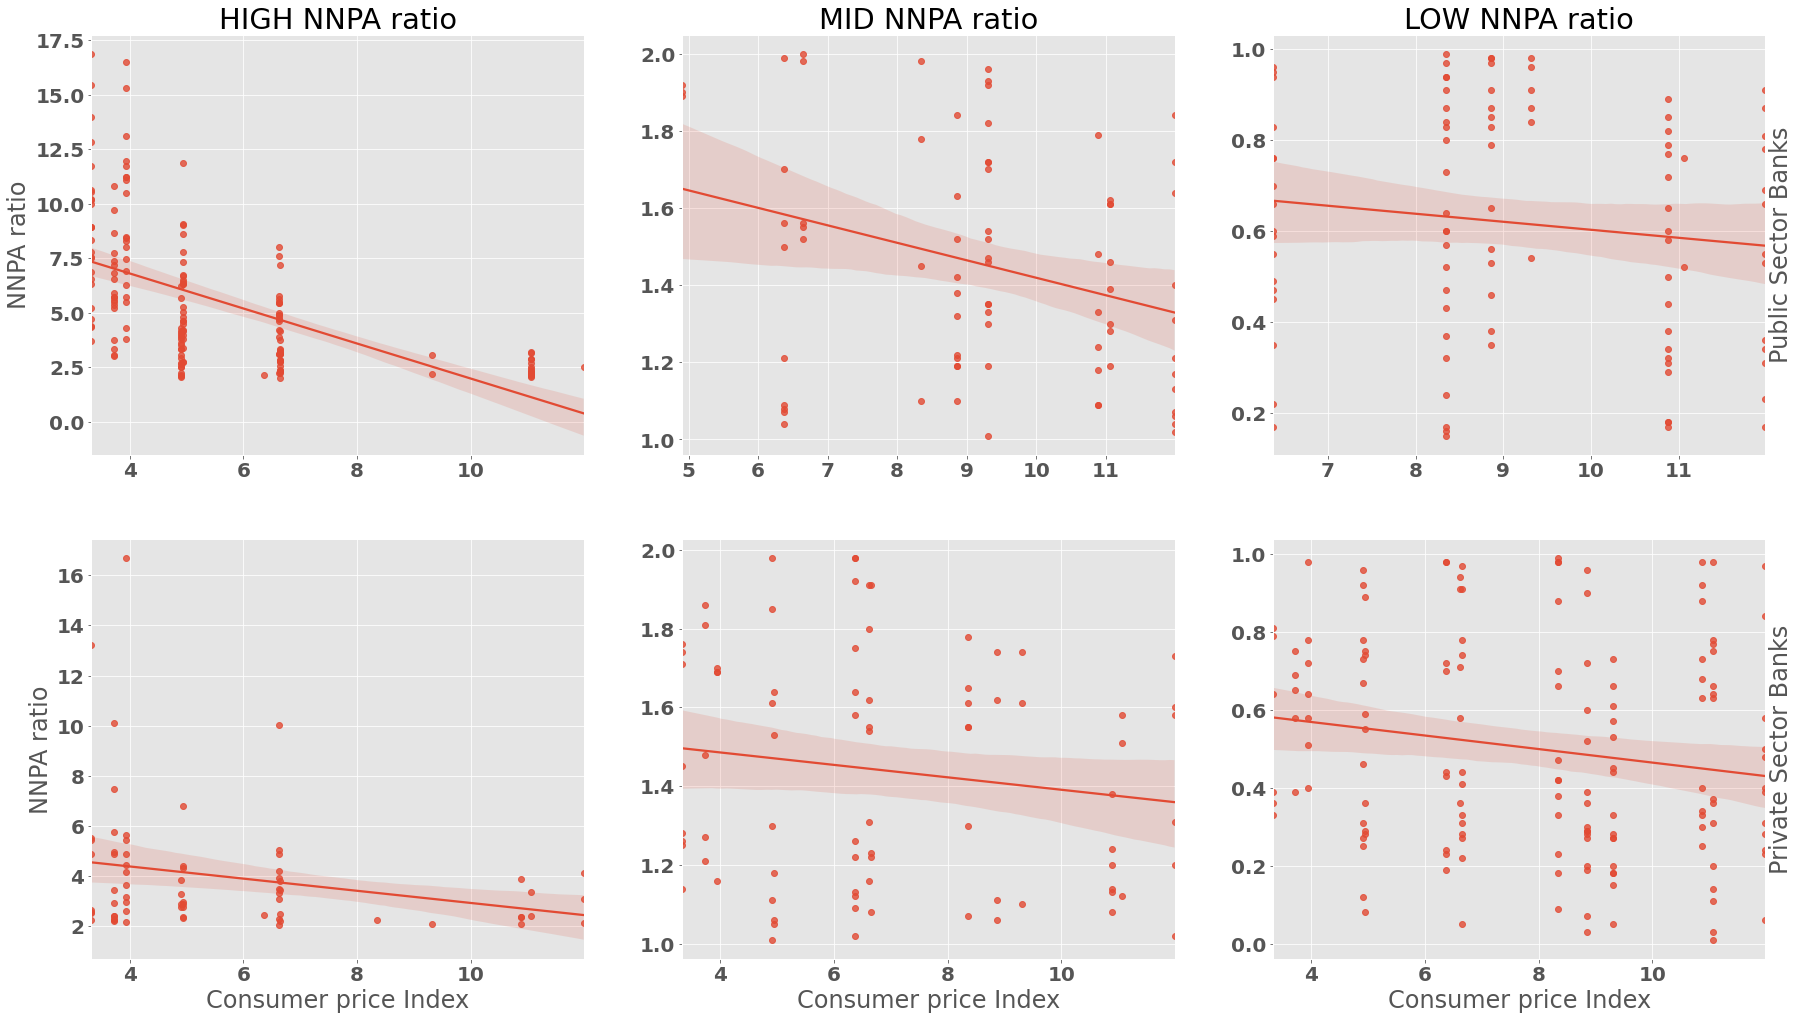

In [59]:
scatter_plot("cpi",'Consumer price Index')

For every bank NNPA ratio has decreasing trend with increase in consumer price index specially for banks with HIGH NNPA ratio in PUBLIC SECTOR BANK group.

# Hypothesis Testing

Let's check the validity of EDA conclusion with hypothesis testing

Hypothesis Statement: - With Government ownership in bank loan monitoring become ineffective.

$H_0: ( \mu_1 <= \mu_2 $)

$H_1: ( \mu_1 > \mu_2 $)

where $\mu_1$ = mean NNPA ratio for Public Sector Banks and $\mu_2$ = mean NNPA ratio for Private Sector Banks

> **Sample statistics**

>$x_1$ = sample mean of NNPA ratio for Public Sector Banks

>$x_2$ = sample mean of NNPA ratio for Private Sector Banks

>$s_1$ = sample standard deviation of NNPA ratio for Public Sector Banks

>$s_2$ = sample standard deviation of NNPA ratio for Private Sector Banks

>$n_1$ = sample size for Public Sector Banks

>$n_2$ = sample size for Private Sector Banks

$ Calculation \ @ \ significance \ level \ of \ 5\%  \  i.e. \alpha=0.05$

We will do purposive sampling for this hypothesis testing as there are some bank which must be included in sample and some bank got merge with others. We will include those banks which were in operation between the year 2016-2020 and data between these year will be taken

In [60]:
# Sampling data for hypothesis testing
hydf = df[df.V1.isin(['STATE BANK OF INDIA', 'ALLAHABAD BANK', 'ANDHRA BANK',
                      'BANK OF BARODA', 'BANK OF INDIA', 'BANK OF MAHARASHTRA',
                      'CANARA BANK', 'CENTRAL BANK OF INDIA', 'CORPORATION BANK',
                      'INDIAN BANK', 'INDIAN OVERSEAS BANK', 'ORIENTAL BANK OF COMMERCE',
                      'PUNJAB AND SIND BANK', 'PUNJAB NATIONAL BANK', 'SYNDICATE BANK',
                      'UCO BANK', 'UNION BANK OF INDIA', 'UNITED BANK OF INDIA',
                      'STATE BANK OF BIKANER & JAIPUR',
                      'STATE BANK OF HYDERABAD', 'STATE BANK OF MYSORE',
                      'STATE BANK OF PATIALA', 'STATE BANK OF TRAVANCORE',
                      'AXIS BANK', 'BANDHAN BANK LIMITED', 'CITY UNION BANK LIMITED',
                      'CSB BANK LIMITED', 'DCB BANK LIMITED', 'FEDERAL BANK',
                      'HDFC BANK', 'ICICI BANK', 'IDBI BANK LIMITED',
                      'IDFC FIRST BANK LIMITED', 'INDUSIND BANK',
                      'JAMMU & KASHMIR BANK LTD', 'KARNATAKA BANK LTD',
                      'KARUR VYSYA BANK', 'KOTAK MAHINDRA BANK LTD',
                      'LAKSHMI VILAS BANK', 'NAINITAL BANK', 'RBL', 'SOUTH INDIAN BANK',
                      'TAMILNAD MERCANTILE BANK LTD', 'DHANLAXMI BANK', 'YES BANK LTD.'
                      ])].copy()

# Sampling data between the year 2016-2020
hydf = hydf[hydf.V0 > 2015].copy()
hydf.reset_index(drop=True, inplace=True)
print(hydf.shape)

(210, 44)


In [61]:
# Calculating mean NNPA ratio for Public and Private Bank sector
x2, x1 = hydf.groupby(['bankGrp']).V36.mean()
print('x1: ',round(x1,3),'\tx2: ',round(x2,3))

s2,s1 = hydf.groupby(['bankGrp']).V36.std()
print('s1: ',round(s1,3),'\ts2: ',round(s2,3))

n2,n1=hydf.bankGrp.value_counts()
print('n1: ',n1,'\tn2: ',n2)

dof = n1 +n2 -2
print('degree of freedom: ', dof)

x1:  7.162 	x2:  2.537
s1:  3.175 	s2:  2.589
n1:  100 	n2:  110
degree of freedom:  208


Here we have sample statistics so we will apply t-test

$t_{test} = \frac{(x_1-x_2)}{\sqrt{(s_1^2/n_1+s_2^2/n_2^2)}}$

It's a right tail  t$\ -$ test. 

For dof = 208 and $\alpha=0.05$ $,\space  t_{table} $ = 1.645

In [62]:
t = (x1-x2)/np.sqrt(((s1**2)/n1)+((s2**2)/n2))
print('t_test:', round(t,3))

print('t_table(for right tail test for dof = 208 and alpha = 0.05): ', 1.645)

t_test: 11.499
t_table(for right tail test for dof = 208 and alpha = 0.05):  1.645


$We \ found \ t_{test} > t_{table} $.

$\therefore we \ will \ reject \ null \ hypothesis \ in \ favour \ of \ alternate \ hypothesis$

*Thus with Government ownership in bank loan monitoring become ineffective.*




---
---



Hypothesis Statement: - Recovery of loan given to priority sector is poor.

$H_0: ( \mu_1 >= \mu_2 $)

$H_1: ( \mu_1 < \mu_2 $)

where $\mu_1$ = Mean NNPA ratio for banks giving less than 30% loan of total advances to Priority Sector
and $\mu_2$ = Mean NNPA ratio for banks giving more than 30% loan of total advances to Priority Sector


> **Sample statistics**

>$x_1$ = sample mean of NNPA ratio for banks giving less than 30% loan of total advances to Priority Sector

>$x_2$ = sample mean of NNPA ratio for banks giving more than 30% loan of total advances to Priority Sector

>$s_1$ = sample standard deviation of NNPA ratio for banks giving less than 30% loan of total advances to Priority Sector

>$s_2$ = sample standard deviation of NNPA ratio for banks giving more than 30% loan of total advances to Priority Sector

>$n_1$ = sample size of banks giving less than 30% loan of total advances to Priority Sector

>$n_2$ = sample size of banks giving more than 30% loan of total advances to Priority Sector

$ Calculation \ @ \ significance \ level \ of \ 5\%  \  i.e. \alpha=0.05$

In [63]:
# Sampling data for banks giving less than 30% loan of total advances and more 
# than 30% loan of total advances  to  priority sector

hydf1,hydf2 = hydf[hydf.V8 <= 30], hydf[hydf.V8 > 30]
hydf1.reset_index(drop=True,inplace=True)
hydf2.reset_index(drop=True,inplace=True)
print(hydf1.shape,hydf2.shape)

(46, 44) (164, 44)


In [64]:
# Calculating mean NNPA ratio for the two category
x1, x2 = hydf1.V36.mean(), hydf2.V36.mean()
print('x1: ',round(x1,3),'\tx2: ',round(x2,3))

s1,s2 = hydf1.V36.std(), hydf2.V36.std()
print('s1: ',round(s1,3),'\ts2: ',round(s2,3))

n1,n2=hydf1.shape[0], hydf2.shape[0]
print('n1: ',n1,'\tn2: ',n2)

dof = n1 + n2 -2
print('degree of freedom: ', dof)

x1:  2.822 	x2:  5.278
s1:  2.174 	s2:  3.853
n1:  46 	n2:  164
degree of freedom:  208


Again we have sample statistics so we will apply t-test with significance of $5\% \space\space i.e. \alpha=0.05$ 

$t_{test} = \frac{(x_1-x_2)}{\sqrt{(s_1^2/n_1+s_2^2/n_2^2)}}$

It is also left tail  t$\ -$ test. 

For dof = 208 and $\alpha=0.05$ $,\space  t_{table} $ = -1.645

In [65]:
t = (x1-x2)/np.sqrt(((s1**2)/n1)+((s2**2)/n2))
print('t_test:', round(t,3))

print('t_table(for left tail test for dof = 208 and alpha = 0.05): ', -1.645)

t_test: -5.586
t_table(for left tail test for dof = 208 and alpha = 0.05):  -1.645


$We \ found \ |{t_{test}}| > |t_{table}| $.

$\therefore we \ will \ reject \ null \ hypothesis \ in \ favour \ of \ alternate \ hypothesis$

*Thus recovery of loan given to priority sector is poor.*



---



---

### **ANOVA**

Hypothesis Statement:- Bank prefer to give more loan to one sector compared to other i.e. there is significant difference in total advances given to different sectors.

Bank total advances falls in different category as we have seen earlier like Term loans, Unsecured advances, Advance to priority sector, Advance to Capital Market Sector, Advance to Real Estate Sector.

For this we will filter the hydf dataframe and keep 3 required columns only.

Columns: V8(Ratio of advances to Priority Sector to total Advances), CapitalMarketSector_adv(Ratio of advances to Capital Market Sector to total Advances) and realEstateSector_adv(Ratio of advances to Real Estate Sector to total Advances)

We will do ANOVA test to find out if there is a significance difference in Advances given to Priority Sector, Capital Market Sector and Real Estate Sector


$H_0: ( \mu_1 = \mu_2 = \mu_3$)

$H_1: ( \mu_1 \not= \mu_2 \not = \mu_3$)

where $\mu_1$ = Mean Advances to Priority sector, $\mu_2$ = Mean Advances to Capital Sector and $\mu_3$ = Mean Advances to Real Estate Sector

$ Calculation \ @ \ significance \ level \ of \ 5\%  \  i.e. \alpha=0.05$

In [66]:
anova_df = hydf[['V8','capitalMarketSector_adv','realEstateSector_adv']].copy()
anova_df.head()

,V8,capitalMarketSector_adv,realEstateSector_adv
0,22.649905,2.500625,97.499375
1,38.508155,3.432487,96.567513
2,44.672440,1.834419,98.165581
3,28.301792,3.351797,96.648203
4,30.517977,3.064409,96.935591


CM = Corrected Mean

SST = Square Sum of Total = $\sum x_i^2-$ CM, where $x_i$ = individual cell values of anova_df

SSB = Square Sum between the column $(\sum \frac{(\sum x_i)^2} {n_i}) - $ CM,

where $\frac{(\sum x_i)^2} {n_i}$ is square of sum of a column divided by number of data point in that column

SSW = Square Sum within the column = SST $-$ SSB

$dof_b$ = degree of freedom between the column = number of column $-$ 1 

$dof_w$ = degree of freedom within the column = total number of data $-$ number of column 

$MS_b = \frac{SSB} {dof_b}$  

$MS_w = \frac{SSW} {dof_w}$  

$F_{calculated} = \frac{MS_b} {MS_w}$

In [67]:
CM = ((anova_df).sum().sum())**2/(anova_df.shape[0]*anova_df.shape[1])
print('CM:  ',round(CM,3))

SST = ((anova_df)**2).sum().sum() - CM
print('SST: ',round(SST,3))

SSB = (((anova_df).sum())**2/anova_df.shape[0]).sum() - CM
print('SSB: ',round(SSB,3))

SSW = SST - SSB
print("SSW: ",round(SSW,3))

dofb = anova_df.shape[1]-1
dofw = anova_df.shape[0]*anova_df.shape[1]-anova_df.shape[1]
print('dofb:', dofb)
print('dofw:', dofw)

MSb = SSB/dofb
MSw = SSW/dofw
print('MSb: ',round(MSb,3))
print('MSw: ',round(MSw,3))

F_cal = MSb/MSw
print('F_calculated: ',round(F_cal,3))

CM:   1343042.171
SST:  890991.869
SSB:  843419.9
SSW:  47571.969
dofb: 2
dofw: 627
MSb:  421709.95
MSw:  75.872
F_calculated:  5558.15



$F_{table} (for \  numerator \   dof \  2 \  and \  denominator \ dof \  627 \ and \ \alpha \ = \ 0.05) = 3$

$We \  found \ F_{calculated} > F_{table},$

So null hypothesis is probably incorrect and we will reject it in the favour of alternate hypothesis.

$\therefore$  Bank prefer to give more loan to one sector compared to other.




---



---

### $\chi^2 \ \ test$

Earlier we say that BANK NNPA ratio can fall in 3 brackets namely, LOW, MID and HIGH.

We would like to see that a bank falling in a particular bracket depends on which bank group it belongs to. For this we need to do $ \chi^2 test $

Hypothesis Statement: Bank falling in a particular NNPA ratio baracket depends on bank group.

$H_0:$ NNPA ratio bracket is independent of bank group

$H_1:$ NNPA ratio is dependent on bank group


chi_df dataframe contains observed data of number of banks belonging to a bank group and falling in a particular NNPA ratio bracket

ex_chi_df dataframe contains expected values for number of banks belonging to a bank group and falling in a particular NNPA ratio bracket

$\chi^2_{calculated} = \sum\frac{(O_i-E_i)^2} {E_i}$

where $O_i = observed \ value$

$\ \ \ \ \ \ \ \ \  E_i = expected \ value$

$ Calculation \ @ \ significance \ level \ of \ 5\%  \  i.e. \alpha=0.05$

In [68]:
chi_df = pd.DataFrame(columns=['HIGH', 'MID', 'LOW'], index=['PUBLIC SECTOR BANKS', 'PRIVATE SECTOR BANKS'])
for col in chi_df.columns:
    for ind in chi_df.index:
        chi_df.loc[ind, col] = hydf[(hydf.bankGrp==ind)&(hydf.npaBins==col)].npaBins.value_counts()[0]


chi_df["Total"] = chi_df.sum(axis=1) # Adding row total

# adding column total
col_total = chi_df.sum(axis=0)
col_total.name = 'Total'
chi_df=chi_df.append(col_total)
chi_df

,HIGH,MID,LOW,Total
PUBLIC SECTOR BANKS,100,0,0,100.0
PRIVATE SECTOR BANKS,49,29,32,110.0
Total,149,29,32,210.0


In [69]:
ex_chi_df = pd.DataFrame(columns=['HIGH', 'MID', 'LOW'], index=['PUBLIC SECTOR BANKS', 'PRIVATE SECTOR BANKS'])
for col in ex_chi_df.columns:
    for ind in ex_chi_df.index:
        ex_chi_df.loc[ind, col] = (chi_df.loc[ind,'Total']*chi_df.loc['Total', col])/chi_df.loc['Total','Total']


ex_chi_df["Total"] = ex_chi_df.sum(axis=1) # Adding row total

# adding column total
col_total = ex_chi_df.sum(axis=0)
col_total.name = 'Total'
ex_chi_df=ex_chi_df.append(col_total)
ex_chi_df

,HIGH,MID,LOW,Total
PUBLIC SECTOR BANKS,70.9524,13.8095,15.2381,100.0
PRIVATE SECTOR BANKS,78.0476,15.1905,16.7619,110.0
Total,149,29,32,210.0


In [70]:
chi_cal = round(((chi_df.iloc[0:-1,0:-1]-ex_chi_df.iloc[0:-1,0:-1])**2/ex_chi_df.iloc[0:-1,0:-1]).sum().sum(),3)
print('Calculated chi_square: ',chi_cal)

# calculating degree of freedom
a, b = chi_df.shape
dof = (a-2)*(b-2)
print('degree of freedom: ',dof)

Calculated chi_square:  78.157
degree of freedom:  2


$table \ \chi^2_2 (for \ \alpha = 0.05)= 5.99$

We found $\chi^2_{calculated}> table \chi^2_2$, so null hyphothesis is probably incorrect and we will reject it int the favour of alternate hypothesis.

$\therefore$ Bank falling in a particular NNPA ratio bracket depends on bank group ir belongs to.

# MODEL BUILDING

In [71]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

Lineaer Regression was applied to understand association of NNPA ratio with different ratios of Schedule Commercial Banks such as
unsecured advances to total advances ratio, Cash deposit ratio, consumer price index, etc
We added lagged NNPA ratio column which contains previous year NNPA ratio and used it as predictor variable.

Bank Group was categorical variable so we did one hot encoding for these variables.

We used stats model to find a summary of the linear regression.

Adjusted_R2 was obtained as 0.792 which means 79 % of the variation of target column expense can be well explained by one of the predictor variables.

Using Variance Inflation factor and stats model summary we removed those variable which were not significant or causing high multi collinearity.


In [72]:
temp_df = pd.get_dummies(df.drop(columns=['V0','V1','npaBins','realEstateSector_adv']),drop_first=True)
#_______________________________________________________________________________


# Adding lNpa column
temp_df['lNpa'] = np.nan

bank_list = df.V1.unique()
year_list = df.V0.unique()

for b in bank_list:
    k = df[df.V1==b].V36
    l = k.tolist()[1:]
    l.append(0)
    ind = k.index
    h = pd.Series(data=l,index=ind)
    temp_df.loc[ind,['lNpa']] = h
#_______________________________________________________________________________


# Relocating NNPA ratio i.e. column V36 to last
tempV36 = temp_df.V36
temp_df.drop(columns=['V36'],inplace=True)
temp_df['V36'] = tempV36
temp_df.reset_index(drop=True, inplace=True)
#_______________________________________________________________________________


# Defining independt variable and target variable
X = temp_df.drop(columns=['V36'])
y = temp_df[['V36']].copy()
#_______________________________________________________________________________


# Dropping columns which are not significant. These column were dropped
# one by one based on the output of multiple linear regression i.e backward
# elemination process was followed
X_temp = X.drop(columns=['V34','V5','V30','V27','V21','V19','V10','V12',
                         'V17','V15','V6','V28','V24','V31','V16','V26',
                         'V13','V29','V18','V9','repo_rate','V33','V7',
                         'V4','V22','V8','capitalMarketSector_adv','V35',
                         'V14','V25','V11','V3','V32','V2']).copy()
X_temp.V23 = np.cbrt(X_temp.V23)

#_______________________________________________________________________________

# Renaming the remaining Columns
column_dict = { 'unsecuredAdvances_totalAdvances':'Ratio of Unsecured Loans to Total Advances',
                'V20':'Ratio of burden to interest income',
                'V23':'Return on equity',
                'cpi':'CPI',
                'lNpa':'Lagged NNPA Ratio',
                'bankGrp_PUBLIC SECTOR BANKS':'Bank Group_Public_Sector_Bank'}

X_temp.rename(columns=column_dict, inplace=True)

y.rename(columns={'V36':'NNPA Ratio'}, inplace=True)
#_______________________________________________________________________________


# Calculating Variance Inflation Factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_temp.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_temp.values, i)
                          for i in range(len(X_temp.columns))]
  
print(vif_data.sort_values(by='VIF',ascending=False))
# print("*"*80)
print('\n\n')
#_______________________________________________________________________________


temp = X_temp[['Bank Group_Public_Sector_Bank']]
temp.reset_index(drop=True, inplace=True)
X = X_temp.drop(columns=['Bank Group_Public_Sector_Bank']).copy() 

scaler = StandardScaler()
scaler.fit(X)
X_ = scaler.transform(X)
X = pd.DataFrame(data=X_,columns=X.columns.tolist())
X.reset_index(drop=True, inplace=True)
X = pd.concat([X,temp], axis=1)
X = sm.add_constant(X)  # Adding constant

# display(X.head())
# print(X.shape)
print("*"*80)
print('\n\n')
#_______________________________________________________________________________


# OLS stats linear model
model = sm.OLS(y,X)
result = model.fit()
print(result.summary())

                                      feature       VIF
3                                         CPI  6.327510
2                            Return on equity  3.485538
0  Ratio of Unsecured Loans to Total Advances  3.087601
5                           Lagged NNPA Ratio  2.696503
1          Ratio of burden to interest income  2.622323
4               Bank Group_Public_Sector_Bank  2.433368



********************************************************************************



                            OLS Regression Results                            
Dep. Variable:             NNPA Ratio   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     392.5
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.50e-208
Time:                        19:02:51   Log-Likelihood:                -1069.1
No. Observations:                 634   AIC:   

In [73]:
print("Mean Square Error is:",result.mse_total)

Mean Square Error is: 8.131716502957724


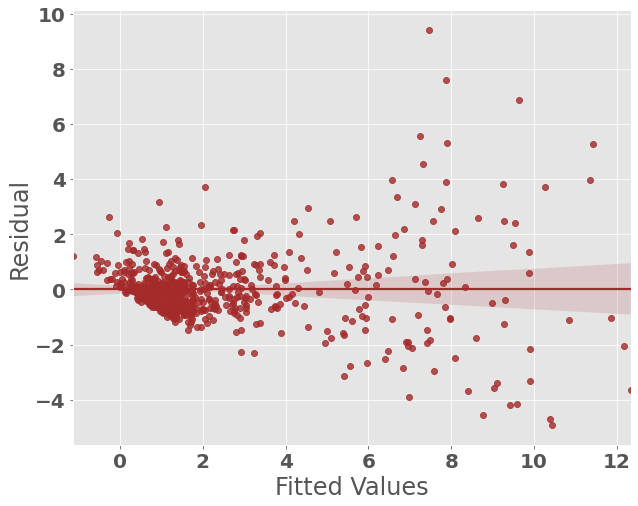

In [74]:
plt.figure(figsize=(10,8))
sns.regplot(x=result.fittedvalues,y=result.resid.values,color='brown')
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.show()

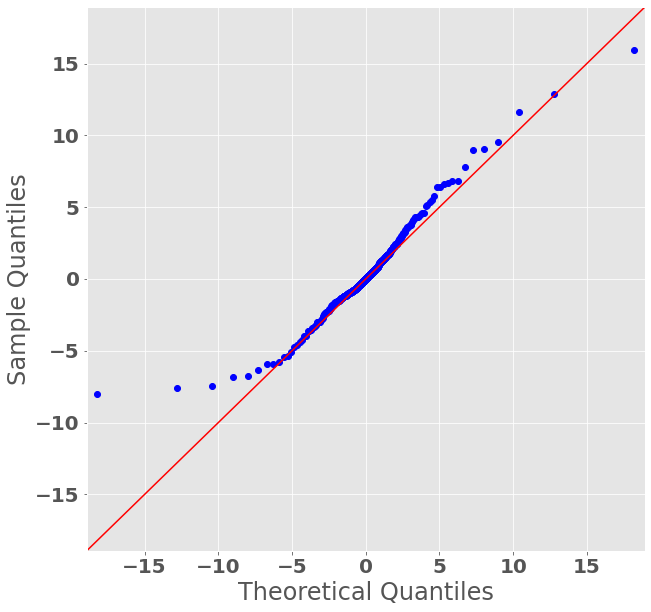

In [75]:
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
fig2 = sm.qqplot( result.resid.values, stats.t,fit=True, line="45", ax=axs)
plt.show()

**Final Regression Equation**

 NNPA Ratio = 2.0789 -1.2205 * (Return on equity) + 1.053 * (Lagged NNPA Ratio) + 0.7683 * (Bank Group_Public_Sector_Bank) -0.4653 * CPI -0.3090  * (Ratio of burden to interest income) -0.2311 * (Ratio of Unsecured Loans to Total Advances)

### FEATURE IMPORTANCE

In [76]:
!pip install shap
import shap

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X,y)
lr.score(X,y)

0.7897376100884762

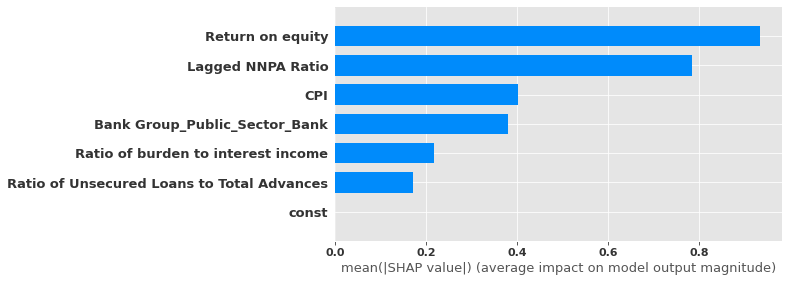

In [79]:
explainer = shap.LinearExplainer(lr,X)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, features=X,
                    feature_names=X.columns, plot_type='bar')

## x-----------------x---------------x------------------x-----------------x-------------------x-----------------------x